In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import butter, lfilter
#search about joblib to store th pd dataframe to execute in less time
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d


In [2]:
omnia = pd.read_csv('Ahmad_readings.csv')
trigno_original = pd.read_excel('cato_exo_3.xlsx')
trigno_imu = pd.read_csv('cato_imu.csv')

In [3]:
# low pass filter for acc
trigno = trigno_original.copy()
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parameters
cutoff = 5  # desired cutoff frequency of the filter, Hz
fs = 148    # sample rate, Hz
order = 4  # filter order

# Apply low-pass filter to Left thigh accelerometer data
trigno['ax_filtered_Lthigh'] = lowpass_filter(trigno['Left thigh: Acc 1.X (IM)'], cutoff, fs, order)
trigno['ay_filtered_Lthigh'] = lowpass_filter(trigno['Left thigh: Acc 1.Y (IM)'], cutoff, fs, order)
trigno['az_filtered_Lthigh'] = lowpass_filter(trigno['Left thigh: Acc 1.Z (IM)'], cutoff, fs, order)


# Apply low-pass filter to Left shank accelerometer data
trigno['ax_filtered_Lshank'] = lowpass_filter(trigno['left shank: Acc 2.X (IM)'], cutoff, fs, order)
trigno['ay_filtered_Lshank'] = lowpass_filter(trigno['left shank: Acc 2.Y (IM)'], cutoff, fs, order)
trigno['az_filtered_Lshank'] = lowpass_filter(trigno['left shank: Acc 2.Z (IM)'], cutoff, fs, order)

# Apply low-pass filter to Right thigh accelerometer data
trigno['ax_filtered_Rthigh'] = lowpass_filter(trigno['right thigh: Acc 3.X (IM)'], cutoff, fs, order)
trigno['ay_filtered_Rthigh'] = lowpass_filter(trigno['right thigh: Acc 3.Y (IM)'], cutoff, fs, order)
trigno['az_filtered_Rthigh'] = lowpass_filter(trigno['right thigh: Acc 3.Z (IM)'], cutoff, fs, order)


# Apply low-pass filter to Right shank accelerometer data
trigno['ax_filtered_Rshank'] = lowpass_filter(trigno['right shank: Acc 4.X (IM)'], cutoff, fs, order)
trigno['ay_filtered_Rshank'] = lowpass_filter(trigno['right shank: Acc 4.Y (IM)'], cutoff, fs, order)
trigno['az_filtered_Rshank'] = lowpass_filter(trigno['right shank: Acc 4.Z (IM)'], cutoff, fs, order)

# Apply low-pass filter to Trunk accelerometer data
trigno['ax_filtered_trunk'] = lowpass_filter(trigno['trunk: Acc 5.X (IM)'], cutoff, fs, order)
trigno['ay_filtered_trunk'] = lowpass_filter(trigno['trunk: Acc 5.Y (IM)'], cutoff, fs, order)
trigno['az_filtered_trunk'] = lowpass_filter(trigno['trunk: Acc 5.Z (IM)'], cutoff, fs, order)




In [4]:
# High pass filter for the Gyro
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parameters
cutoffH = 0.1  # desired cutoff frequency of the filter, Hz
orderH=4
# Apply high-pass filter to Left thigh gyroscope data
trigno['gx_filtered_Lthigh'] = highpass_filter(trigno['Left thigh: Gyro 1.X (IM)'], cutoffH, fs, orderH)
trigno['gy_filtered_Lthigh'] = highpass_filter(trigno['Left thigh: Gyro 1.Y (IM)'], cutoffH, fs, orderH)
trigno['gz_filtered_Lthigh'] = highpass_filter(trigno['Left thigh: Gyro 1.Z (IM)'], cutoffH, fs, orderH)

# Apply high-pass filter to Left shank gyroscope data
trigno['gx_filtered_Lshank'] = highpass_filter(trigno['left shank: Gyro 2.X (IM)'], cutoffH, fs, orderH)
trigno['gy_filtered_Lshank'] = highpass_filter(trigno['left shank: Gyro 2.Y (IM)'], cutoffH, fs, orderH)
trigno['gz_filtered_Lshank'] = highpass_filter(trigno['left shank: Gyro 2.Y (IM)'], cutoffH, fs, orderH)

# Apply high-pass filter to Right thigh gyroscope data
trigno['gx_filtered_Rthigh'] = highpass_filter(trigno['right thigh: Gyro 3.X (IM)'], cutoffH, fs, orderH)
trigno['gy_filtered_Rthigh'] = highpass_filter(trigno['right thigh: Gyro 3.X (IM)'], cutoffH, fs, orderH)
trigno['gz_filtered_Rthigh'] = highpass_filter(trigno['right thigh: Gyro 3.X (IM)'], cutoffH, fs, orderH)

# Apply high-pass filter to Right shank gyroscope data
trigno['gx_filtered_Rshank'] = highpass_filter(trigno['right shank: Gyro 4.X (IM)'], cutoffH, fs, orderH)
trigno['gy_filtered_Rshank'] = highpass_filter(trigno['right shank: Gyro 4.Y (IM)'], cutoffH, fs, orderH)
trigno['gz_filtered_Rshank'] = highpass_filter(trigno['right shank: Gyro 4.Z (IM)'], cutoffH, fs, orderH)

# Apply high-pass filter trunk gyroscope data
trigno['gx_filtered_trunk'] = highpass_filter(trigno['trunk: Gyro 5.X (IM)'], cutoffH, fs, orderH)
trigno['gy_filtered_trunk'] = highpass_filter(trigno['trunk: Gyro 5.Y (IM)'], cutoffH, fs, orderH)
trigno['gz_filtered_trunk'] = highpass_filter(trigno['trunk: Gyro 5.Z (IM)'], cutoffH, fs, orderH)




In [5]:
# low pass filter for acc
trigno_i = trigno_imu.copy()


# Apply low-pass filter to Left thigh accelerometer data
trigno_i['ax_filtered_Lthigh_i'] = lowpass_filter(trigno_i['Left thigh: Acc 1.X (IM)'], cutoff, fs, order)
trigno_i['ay_filtered_Lthigh_i'] = lowpass_filter(trigno_i['Left thigh: Acc 1.Y (IM)'], cutoff, fs, order)
trigno_i['az_filtered_Lthigh_i'] = lowpass_filter(trigno_i['Left thigh: Acc 1.Z (IM)'], cutoff, fs, order)


# Apply low-pass filter to Left shank accelerometer data
trigno_i['ax_filtered_Lshank_i'] = lowpass_filter(trigno_i['left shank: Acc 2.X (IM)'], cutoff, fs, order)
trigno_i['ay_filtered_Lshank_i'] = lowpass_filter(trigno_i['left shank: Acc 2.Y (IM)'], cutoff, fs, order)
trigno_i['az_filtered_Lshank_i'] = lowpass_filter(trigno_i['left shank: Acc 2.Z (IM)'], cutoff, fs, order)

# Apply low-pass filter to Right thigh accelerometer data
trigno_i['ax_filtered_Rthigh_i'] = lowpass_filter(trigno_i['right thigh: Acc 3.X (IM)'], cutoff, fs, order)
trigno_i['ay_filtered_Rthigh_i'] = lowpass_filter(trigno_i['right thigh: Acc 3.Y (IM)'], cutoff, fs, order)
trigno_i['az_filtered_Rthigh_i'] = lowpass_filter(trigno_i['right thigh: Acc 3.Z (IM)'], cutoff, fs, order)

# Apply low-pass filter to Right shank accelerometer data
trigno_i['ax_filtered_Rshank_i'] = lowpass_filter(trigno_i['right shank: Acc 4.X (IM)'], cutoff, fs, order)
trigno_i['ay_filtered_Rshank_i'] = lowpass_filter(trigno_i['right shank: Acc 4.Y (IM)'], cutoff, fs, order)
trigno_i['az_filtered_Rshank_i'] = lowpass_filter(trigno_i['right shank: Acc 4.Z (IM)'], cutoff, fs, order)

# Apply low-pass filter to Trunk accelerometer data
trigno_i['ax_filtered_trunk_i'] = lowpass_filter(trigno_i['trunk: Acc 5.X (IM)'], cutoff, fs, order)
trigno_i['ay_filtered_trunk_i'] = lowpass_filter(trigno_i['trunk: Acc 5.Y (IM)'], cutoff, fs, order)
trigno_i['az_filtered_trunk_i'] = lowpass_filter(trigno_i['trunk: Acc 5.Z (IM)'], cutoff, fs, order)



In [6]:


# Apply high-pass filter to Left thigh gyroscope data
trigno_i['gx_filtered_Lthigh_i'] = highpass_filter(trigno_i['Left thigh: Gyro 1.X (IM)'], cutoffH, fs, order)
trigno_i['gy_filtered_Lthigh_i'] = highpass_filter(trigno_i['Left thigh: Gyro 1.Y (IM)'], cutoffH, fs, order)
trigno_i['gz_filtered_Lthigh_i'] = highpass_filter(trigno_i['Left thigh: Gyro 1.Z (IM)'], cutoffH, fs, order)

# Apply high-pass filter to Left shank gyroscope data
trigno_i['gx_filtered_Lshank_i'] = highpass_filter(trigno_i['left shank: Gyro 2.X (IM)'], cutoffH, fs, order)
trigno_i['gy_filtered_Lshank_i'] = highpass_filter(trigno_i['left shank: Gyro 2.Y (IM)'], cutoffH, fs, order)
trigno_i['gz_filtered_Lshank_i'] = highpass_filter(trigno_i['left shank: Gyro 2.Y (IM)'], cutoffH, fs, order)

# Apply high-pass filter to Right thigh gyroscope data
trigno_i['gx_filtered_Rthigh_i'] = highpass_filter(trigno_i['right thigh: Gyro 3.X (IM)'], cutoffH, fs, order)
trigno_i['gy_filtered_Rthigh_i'] = highpass_filter(trigno_i['right thigh: Gyro 3.X (IM)'], cutoffH, fs, order)
trigno_i['gz_filtered_Rthigh_i'] = highpass_filter(trigno_i['right thigh: Gyro 3.X (IM)'], cutoffH, fs, order)

# Apply high-pass filter to Right shank gyroscope data
trigno_i['gx_filtered_Rshank_i'] = highpass_filter(trigno_i['right shank: Gyro 4.X (IM)'], cutoffH, fs, order)
trigno_i['gy_filtered_Rshank_i'] = highpass_filter(trigno_i['right shank: Gyro 4.Y (IM)'], cutoffH, fs, order)
trigno_i['gz_filtered_Rshank_i'] = highpass_filter(trigno_i['right shank: Gyro 4.Z (IM)'], cutoffH, fs, order)

# Apply high-pass filter trunk gyroscope data
trigno_i['gx_filtered_trunk_i'] = highpass_filter(trigno_i['trunk: Gyro 5.X (IM)'], cutoffH, fs, order)
trigno_i['gy_filtered_trunk_i'] = highpass_filter(trigno_i['trunk: Gyro 5.Y (IM)'], cutoffH, fs, order)
trigno_i['gz_filtered_trunk_i'] = highpass_filter(trigno_i['trunk: Gyro 5.Z (IM)'], cutoffH, fs, order)


In [7]:
def compute_envelopes(signal, order=100):
    """
    Computes the upper and lower envelopes of a signal.

    Parameters:
    - signal (numpy array): 1D array of signal data.
    - order (int): Number of points to be used for local maxima and minima.

    Returns:
    - upper_envelope (numpy array): Upper envelope of the signal.
    - lower_envelope (numpy array): Lower envelope of the signal.
    """
    # Find local maxima and minima
    local_maxima = argrelextrema(signal, np.greater, order=order)[0]
    local_minima = argrelextrema(signal, np.less, order=order)[0]
    
    # Interpolate the upper and lower envelopes
    x = np.arange(len(signal))
    upper_envelope = np.interp(x, local_maxima, signal[local_maxima], left=np.nan, right=np.nan)
    lower_envelope = np.interp(x, local_minima, signal[local_minima], left=np.nan, right=np.nan)
    
    # Fill NaN values by interpolation
    upper_envelope = np.nan_to_num(upper_envelope, nan=np.nanmax(signal))
    lower_envelope = np.nan_to_num(lower_envelope, nan=np.nanmin(signal))
    
    return upper_envelope, lower_envelope

In [8]:
def detect_peaks_from_envelope(signal, upper_envelope, lower_envelope):
    """
    Detects peaks and troughs from the signal and its envelopes.

    Parameters:
    - signal (numpy array): 1D array of signal data.
    - upper_envelope (numpy array): Upper envelope of the signal.
    - lower_envelope (numpy array): Lower envelope of the signal.

    Returns:
    - peaks (numpy array): Indices of detected peaks.
    - troughs (numpy array): Indices of detected troughs.
    """
    # Detect peaks (signal exceeds upper envelope)
    peaks = np.where(signal >= upper_envelope)[0]
    
    # Detect troughs (signal falls below lower envelope)
    troughs = np.where(signal <= lower_envelope)[0]
    
    return peaks, troughs

In [9]:
def extract_gait_cycles(signal, peaks, troughs, num_cycles):
    """
    Extract segments of signal data for the specified number of gait cycles.

    Parameters:
    - signal (numpy array): 1D array of signal data.
    - peaks (numpy array): Indices of detected peaks.
    - troughs (numpy array): Indices of detected troughs.
    - num_cycles (int): Number of gait cycles to extract.

    Returns:
    - cycles (list of numpy arrays): List of extracted gait cycle segments.
    """
    cycles = []
    
    for i in range(num_cycles):
        if i < len(troughs) - 1:
            start = troughs[i]
            end = troughs[i + 1]
            segment = signal[start:end]
            cycles.append(segment)
    
    return cycles

In [10]:
def normalize_cycles(cycles, target_length=100):
    """
    Normalize the length of gait cycles by resampling.

    Parameters:
    - cycles (list of numpy arrays): List of gait cycle segments.
    - target_length (int): Desired length of normalized gait cycles.

    Returns:
    - normalized_cycles (numpy array): Array of normalized gait cycle segments.
    """
    normalized_cycles = []
    
    for cycle in cycles:
        # Check for valid length to avoid empty cycles
        if len(cycle) > 1:
            x = np.arange(len(cycle))
            # Ensure that x values are unique by adding a small offset if necessary
            if np.any(np.diff(x) == 0):
                x = x + np.linspace(0, 1e-10, len(x))

            try:
                interp_func = interp1d(x, cycle, kind='linear', fill_value='extrapolate')
                x_new = np.linspace(0, len(cycle) - 1, target_length)
                normalized_cycle = interp_func(x_new)

                # Replace invalid values with zeros or handle as needed
                normalized_cycle = np.nan_to_num(normalized_cycle)
                normalized_cycles.append(normalized_cycle)

            except Exception as e:
                print(f"Error during interpolation: {e}")
    
    return np.array(normalized_cycles)


In [11]:
def concatenate_cycles(normalized_cycles):
    """
    Concatenate normalized gait cycles into a continuous signal.

    Parameters:
    - normalized_cycles (numpy array): Array of normalized gait cycle segments.

    Returns:
    - concatenated_signal (numpy array): Concatenated signal of gait cycles.
    """
    return np.concatenate(normalized_cycles)

0


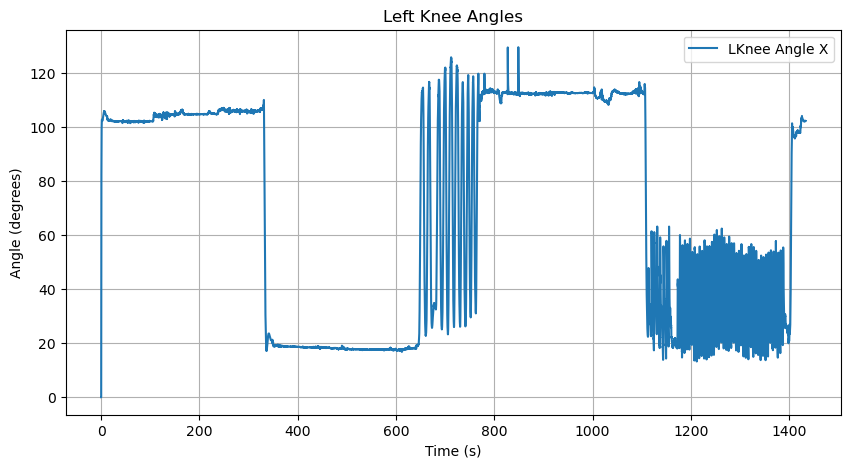

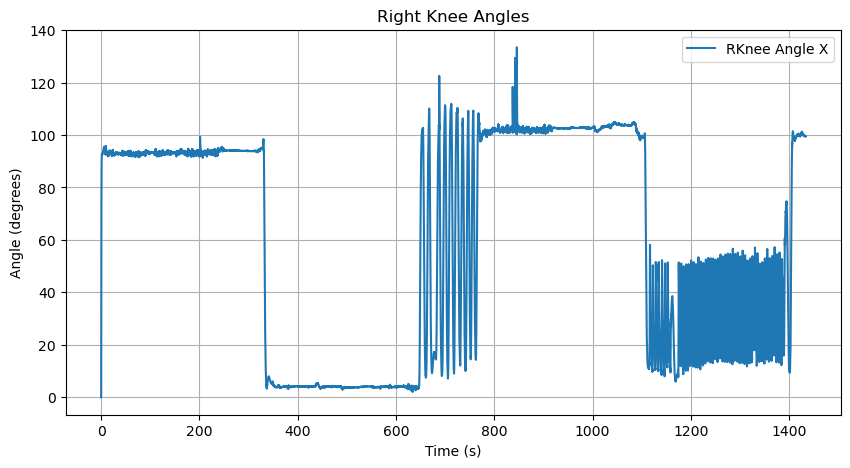

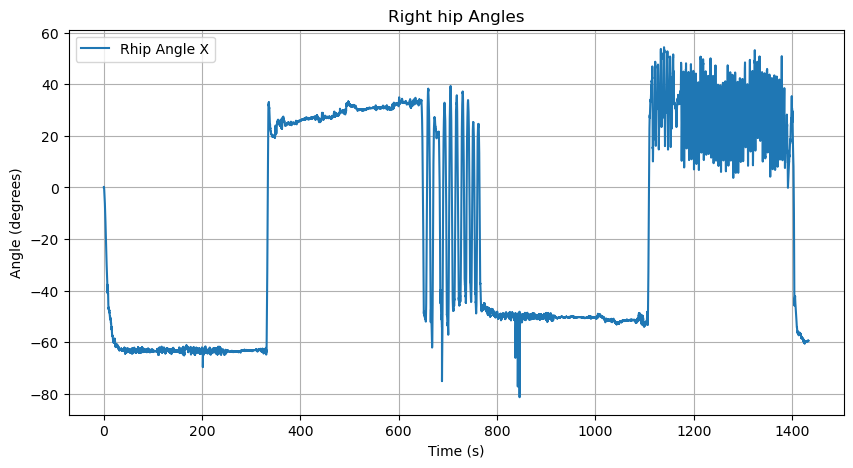

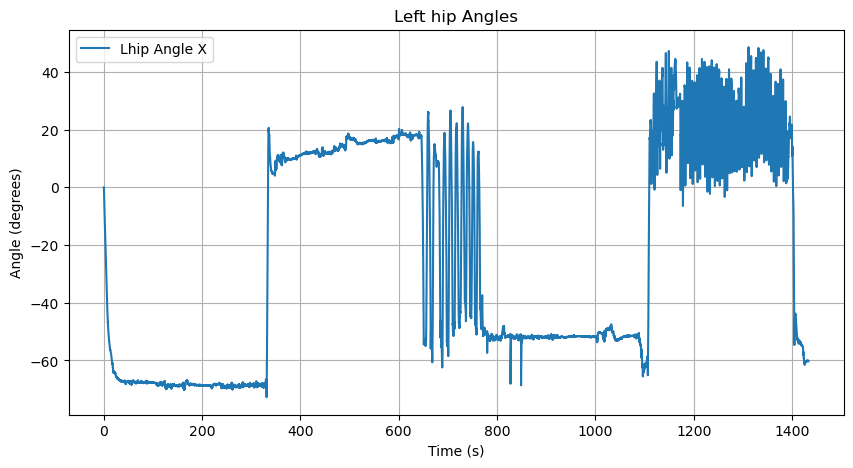

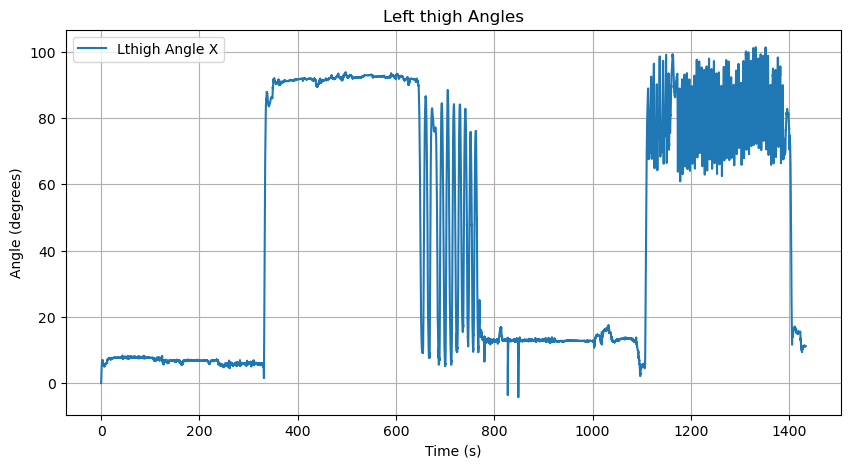

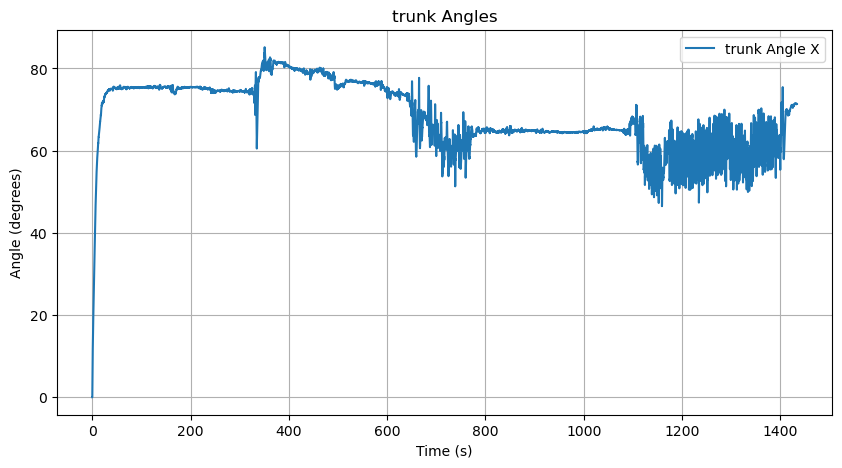

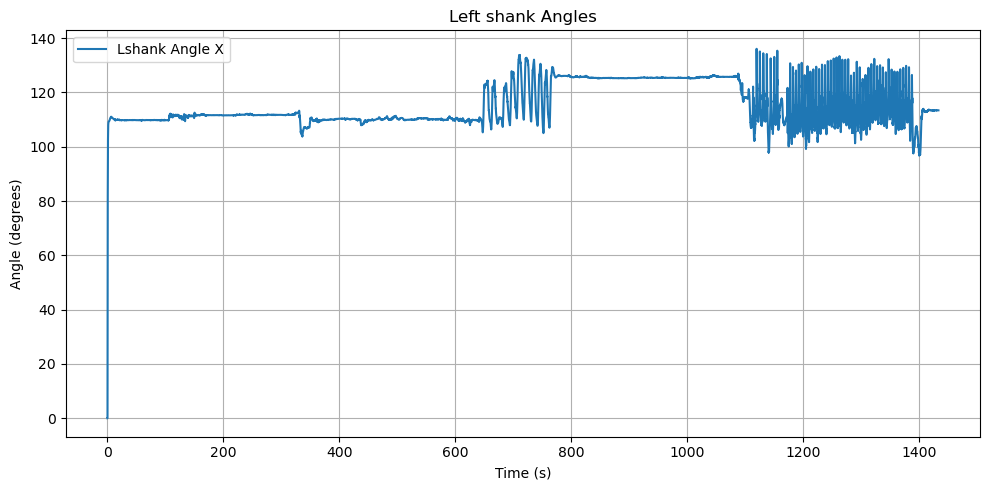

In [12]:


# Initialize complementary filter variables
alpha = 0.98
alpha_tr = 0.999
theta_x_Lthigh = 0
theta_y_Lthigh = 0
theta_x_Lshank = 0
theta_y_Lshank = 0

theta_x_Rthigh = 0
theta_y_Rthigh = 0
theta_x_Rshank = 0
theta_y_Rshank = 0

theta_x_trunk = 0
theta_y_trunk = 0

angles_Lthigh = []
angles_Lshank = []
Lknee_angles = []

angles_Rthigh = []
angles_Rshank = []
Rknee_angles = []

angles_trunk = []
Rhip_angles =[]
Lhip_angles =[]
trigno['X[s]'].fillna(method='ffill', inplace=True)
# Complementary filter for both thigh and shank
for i in range(1, len(trigno)):
    dt = trigno['X[s]'][i] - trigno['X[s]'][i-1]
    
    # Accelerometer angles for Left thigh
    acc_angle_x_Lthigh = np.arctan2(trigno['ay_filtered_Lthigh'][i], trigno['az_filtered_Lthigh'][i]) * 180 / np.pi
    acc_angle_y_Lthigh = np.arctan2(trigno['ax_filtered_Lthigh'][i], trigno['az_filtered_Lthigh'][i]) * 180 / np.pi
    
    # Gyroscope angles for Left thigh (integrating)
    gyro_angle_x_Lthigh = trigno['gx_filtered_Lthigh'][i] * dt
    gyro_angle_y_Lthigh = trigno['gy_filtered_Lthigh'][i] * dt

    # Acc ang for Right thigh
    acc_angle_x_Rthigh = np.arctan2(trigno['ay_filtered_Rthigh'][i], trigno['az_filtered_Rthigh'][i]) * 180 / np.pi
    acc_angle_y_Rthigh = np.arctan2(trigno['ax_filtered_Rthigh'][i], trigno['az_filtered_Rthigh'][i]) * 180 / np.pi


    # Gyro angles for Right thigh
    gyro_angle_x_Rthigh = trigno['gx_filtered_Rthigh'][i] * dt
    gyro_angle_y_Rthigh = trigno['gy_filtered_Rthigh'][i] * dt

    

    # Complementary filter for Left thigh and right thigh
    theta_x_Lthigh = alpha * (theta_x_Lthigh + gyro_angle_x_Lthigh) + (1 - alpha) * acc_angle_x_Lthigh
    theta_y_Lthigh = alpha * (theta_y_Lthigh + gyro_angle_y_Lthigh) + (1 - alpha) * acc_angle_y_Lthigh

    theta_x_Rthigh = alpha * (theta_x_Rthigh + gyro_angle_x_Rthigh) + (1 - alpha) * acc_angle_x_Rthigh
    theta_y_Rthigh = alpha * (theta_y_Rthigh + gyro_angle_y_Rthigh) + (1 - alpha) * acc_angle_y_Rthigh

    
    # Append Left and right thigh angles
    angles_Lthigh.append((theta_x_Lthigh, theta_y_Lthigh))

    angles_Rthigh.append((theta_x_Rthigh, theta_y_Rthigh))
    

    
    # Accelerometer angles for Left and right shank
    acc_angle_x_Lshank = np.arctan2(trigno['ay_filtered_Lshank'][i], trigno['az_filtered_Lshank'][i]) * 180 / np.pi
    acc_angle_y_Lshank = np.arctan2(trigno['ax_filtered_Lshank'][i], trigno['az_filtered_Lshank'][i]) * 180 / np.pi

    acc_angle_x_Rshank = np.arctan2(trigno['ay_filtered_Rshank'][i], trigno['az_filtered_Rshank'][i]) * 180 / np.pi
    acc_angle_y_Rshank = np.arctan2(trigno['ax_filtered_Rshank'][i], trigno['az_filtered_Rshank'][i]) * 180 / np.pi
    
    # Gyroscope angles for Left and right shank (integrating)
    gyro_angle_x_Lshank = trigno['gx_filtered_Lshank'][i] * dt
    gyro_angle_y_Lshank = trigno['gy_filtered_Lshank'][i] * dt

    gyro_angle_x_Rshank = trigno['gx_filtered_Rshank'][i] * dt
    gyro_angle_y_Rshank = trigno['gy_filtered_Rshank'][i] * dt


    # Complementary filter for Left and right shank
    theta_x_Lshank = alpha * (theta_x_Lshank + gyro_angle_x_Lshank) + (1 - alpha) * acc_angle_x_Lshank
    theta_y_Lshank = alpha * (theta_y_Lshank + gyro_angle_y_Lshank) + (1 - alpha) * acc_angle_y_Lshank

    theta_x_Rshank = alpha * (theta_x_Rshank + gyro_angle_x_Rshank) + (1 - alpha) * acc_angle_x_Rshank
    theta_y_Rshank = alpha * (theta_y_Rshank + gyro_angle_y_Rshank) + (1 - alpha) * acc_angle_y_Rshank


    
    # Append Left and right shank angles
    angles_Lshank.append((theta_x_Lshank, theta_y_Lshank))

    angles_Rshank.append((theta_x_Rshank, theta_y_Rshank))


    # Accelerometer angles for trunk
    acc_angle_x_trunk= np.arctan2(trigno['ay_filtered_trunk'][i], trigno['az_filtered_trunk'][i]) * 180 / np.pi
    acc_angle_y_trunk = np.arctan2(trigno['ax_filtered_trunk'][i], trigno['az_filtered_trunk'][i]) * 180 / np.pi

    
    
    # Gyroscope angles for trunk (integrating)
    gyro_angle_x_trunk = trigno['gx_filtered_trunk'][i] * dt
    gyro_angle_y_trunk = trigno['gy_filtered_trunk'][i] * dt

    


    # Complementary filter for trunk
    theta_x_trunk = alpha_tr * (theta_x_trunk + gyro_angle_x_trunk) + (1 - alpha_tr) * acc_angle_x_trunk
    theta_y_trunk = alpha_tr * (theta_y_trunk + gyro_angle_y_trunk) + (1 - alpha_tr) * acc_angle_y_trunk

     # Append Left and right shank angles
    angles_trunk.append(((theta_x_trunk), theta_y_trunk))

    
    # Calculate knee angles
    Lknee_angle_x = -(theta_x_Lthigh - theta_x_Lshank)
    Lknee_angle_y = theta_y_Lthigh - theta_y_Lshank
    Lknee_angles.append((Lknee_angle_x, Lknee_angle_y))

    Rknee_angle_x = -(theta_x_Rthigh - theta_x_Rshank)
    Rknee_angle_y = theta_y_Rthigh - theta_y_Rshank
    Rknee_angles.append((Rknee_angle_x, Rknee_angle_y))



    #calculate hip angles (hip angle = thigh angle - trunk angle)
    Lhip_angle_x = ( theta_x_Lthigh -(theta_x_trunk))
    Lhip_angle_y = theta_y_Lthigh - theta_y_trunk
    Lhip_angles.append((Lhip_angle_x, Lhip_angle_y))

    Rhip_angle_x = (theta_x_Rthigh - (theta_x_trunk))
    Rhip_angle_y = theta_y_Rthigh - theta_y_trunk
    Rhip_angles.append((Rhip_angle_x, Rhip_angle_y))





# Convert lists to arrays for plotting


# Ensure no NaN values are present in the X[s] column
print(trigno['X[s]'].isna().sum())

angles_Lthigh = np.array(angles_Lthigh)
angles_Lshank = np.array(angles_Lshank)
Lknee_angles = np.array(Lknee_angles)

angles_Rthigh = np.array(angles_Rthigh)
angles_Rshank = np.array(angles_Rshank)
Rknee_angles = np.array(Rknee_angles)

angles_trunk = np.array(angles_trunk)
Rhip_angles = np.array(Rhip_angles)
Lhip_angles = np.array(Lhip_angles)


# Plotting the angles

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], Lknee_angles[:, 0], label='LKnee Angle X')
#plt.plot(trigno['X[s]'][1:], Lknee_angles[:, 1], label='LKnee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Left Knee Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], Rknee_angles[:, 0], label='RKnee Angle X')
#plt.plot(trigno['X[s]'][1:], Rknee_angles[:, 1], label='RKnee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Right Knee Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], Rhip_angles[:, 0], label='Rhip Angle X')
#plt.plot(trigno['X[s]'][1:], Rhip_angles[:, 1], label='Rhip Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Right hip Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], Lhip_angles[:, 0], label='Lhip Angle X')
#plt.plot(trigno['X[s]'][1:], Lhip_angles[:, 1], label='Lhip Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Left hip Angles')
plt.legend()
plt.grid(True)


plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], angles_Lthigh[:, 0], label='Lthigh Angle X')
#plt.plot(trigno['X[s]'][1:], Lhip_angles[:, 1], label='Lhip Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Left thigh Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], angles_trunk[:, 0], label='trunk Angle X')
#plt.plot(trigno['X[s]'][1:], Lhip_angles[:, 1], label='Lhip Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('trunk Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], angles_Lshank[:, 0], label='Lshank Angle X')
#plt.plot(trigno['X[s]'][1:], Lhip_angles[:, 1], label='Lhip Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Left shank Angles')
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()

#print(f"Length of X[s]: {len(trigno['X[s]'])}")
#print(f"Length of angles_Lthigh: {len(angles_Lthigh)}")

#print(trigno['X[s]'].head())
#print(angles_Lthigh[:5])






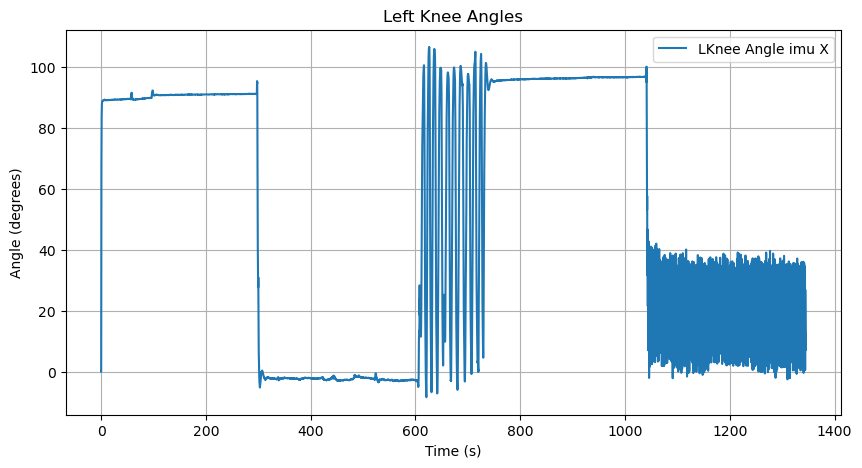

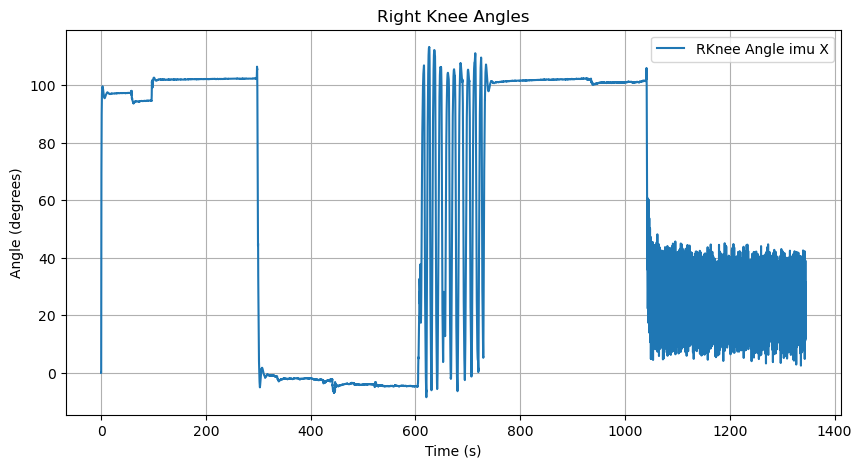

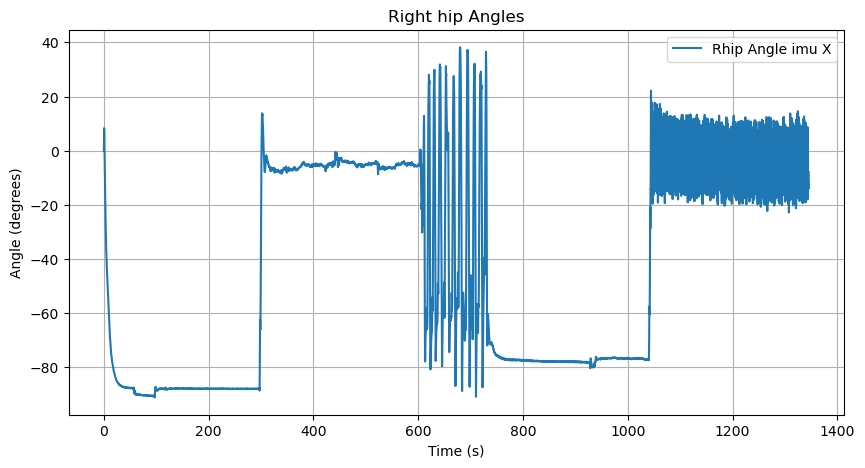

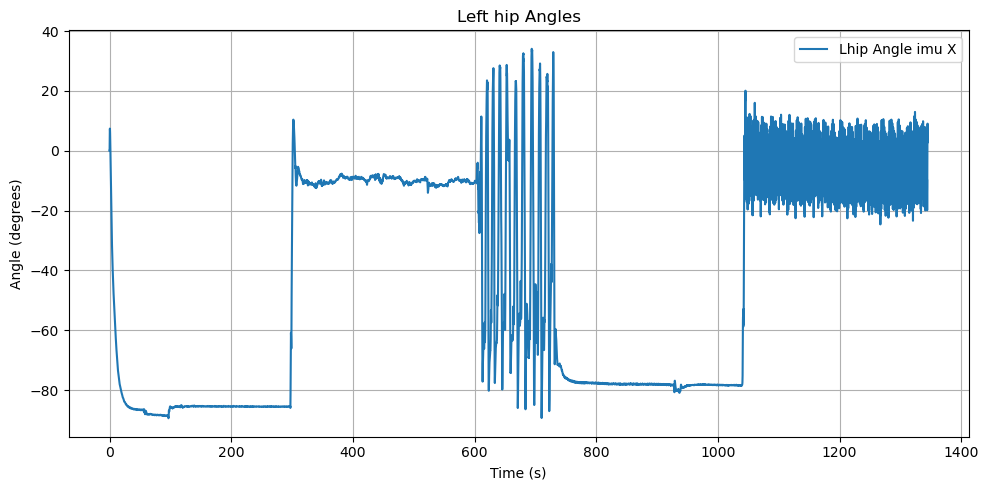

In [13]:
# Initialize complementary filter variables
alpha_i = 0.98
alpha_tr_i = 0.999
theta_x_Lthigh_i = 0
theta_y_Lthigh_i = 0
theta_x_Lshank_i = 0
theta_y_Lshank_i = 0

theta_x_Rthigh_i = 0
theta_y_Rthigh_i = 0
theta_x_Rshank_i = 0
theta_y_Rshank_i = 0

theta_x_trunk_i = 0
theta_y_trunk_i = 0

angles_Lthigh_i = []
angles_Lshank_i = []
Lknee_angles_i = []

angles_Rthigh_i = []
angles_Rshank_i = []
Rknee_angles_i = []

angles_trunk_i = []
Rhip_angles_i =[]
Lhip_angles_i =[]
trigno_i['X[s]'].fillna(method='ffill', inplace=True)
# Complementary filter for both thigh and shank
for i in range(1, len(trigno_i)):
    dt = trigno_i['X[s]'][i] - trigno_i['X[s]'][i-1]
    
    # Accelerometer angles for Left thigh
    acc_angle_x_Lthigh_i = np.arctan2(trigno_i['ay_filtered_Lthigh_i'][i], trigno_i['az_filtered_Lthigh_i'][i]) * 180 / np.pi
    acc_angle_y_Lthigh_i = np.arctan2(trigno_i['ax_filtered_Lthigh_i'][i], trigno_i['az_filtered_Lthigh_i'][i]) * 180 / np.pi
    
    # Gyroscope angles for Left thigh (integrating)
    gyro_angle_x_Lthigh_i = trigno_i['gx_filtered_Lthigh_i'][i] * dt
    gyro_angle_y_Lthigh_i = trigno_i['gy_filtered_Lthigh_i'][i] * dt

    # Acc ang for Right thigh
    acc_angle_x_Rthigh_i = np.arctan2(trigno_i['ay_filtered_Rthigh_i'][i], trigno_i['az_filtered_Rthigh_i'][i]) * 180 / np.pi
    acc_angle_y_Rthigh_i = np.arctan2(trigno_i['ax_filtered_Rthigh_i'][i], trigno_i['az_filtered_Rthigh_i'][i]) * 180 / np.pi


    # Gyro angles for Right thigh
    gyro_angle_x_Rthigh_i = trigno_i['gx_filtered_Rthigh_i'][i] * dt
    gyro_angle_y_Rthigh_i = trigno_i['gy_filtered_Rthigh_i'][i] * dt

    

    # Complementary filter for Left thigh and right thigh
    theta_x_Lthigh_i = alpha * (theta_x_Lthigh_i + gyro_angle_x_Lthigh_i) + (1 - alpha) * acc_angle_x_Lthigh_i
    theta_y_Lthigh_i = alpha * (theta_y_Lthigh_i + gyro_angle_y_Lthigh_i) + (1 - alpha) * acc_angle_y_Lthigh_i

    theta_x_Rthigh_i = alpha * (theta_x_Rthigh_i + gyro_angle_x_Rthigh_i) + (1 - alpha) * acc_angle_x_Rthigh_i
    theta_y_Rthigh_i = alpha * (theta_y_Rthigh_i + gyro_angle_y_Rthigh_i) + (1 - alpha) * acc_angle_y_Rthigh_i

    
    # Append Left and right thigh angles
    angles_Lthigh_i.append((theta_x_Lthigh_i, theta_y_Lthigh_i))

    angles_Rthigh_i.append((theta_x_Rthigh_i, theta_y_Rthigh_i))
    

    
    # Accelerometer angles for Left and right shank
    acc_angle_x_Lshank_i = np.arctan2(trigno_i['ay_filtered_Lshank_i'][i], trigno_i['az_filtered_Lshank_i'][i]) * 180 / np.pi
    acc_angle_y_Lshank_i = np.arctan2(trigno_i['ax_filtered_Lshank_i'][i], trigno_i['az_filtered_Lshank_i'][i]) * 180 / np.pi

    acc_angle_x_Rshank_i = np.arctan2(trigno_i['ay_filtered_Rshank_i'][i], trigno_i['az_filtered_Rshank_i'][i]) * 180 / np.pi
    acc_angle_y_Rshank_i = np.arctan2(trigno_i['ax_filtered_Rshank_i'][i], trigno_i['az_filtered_Rshank_i'][i]) * 180 / np.pi
    
    # Gyroscope angles for Left and right shank (integrating)
    gyro_angle_x_Lshank_i = trigno_i['gx_filtered_Lshank_i'][i] * dt
    gyro_angle_y_Lshank_i = trigno_i['gy_filtered_Lshank_i'][i] * dt

    gyro_angle_x_Rshank_i = trigno_i['gx_filtered_Rshank_i'][i] * dt
    gyro_angle_y_Rshank_i = trigno_i['gy_filtered_Rshank_i'][i] * dt


    # Complementary filter for Left and right shank
    theta_x_Lshank_i = alpha * (theta_x_Lshank_i + gyro_angle_x_Lshank_i) + (1 - alpha) * acc_angle_x_Lshank_i
    theta_y_Lshank_i = alpha * (theta_y_Lshank_i + gyro_angle_y_Lshank_i) + (1 - alpha) * acc_angle_y_Lshank_i

    theta_x_Rshank_i = alpha * (theta_x_Rshank_i + gyro_angle_x_Rshank_i) + (1 - alpha) * acc_angle_x_Rshank_i
    theta_y_Rshank_i = alpha * (theta_y_Rshank_i + gyro_angle_y_Rshank_i) + (1 - alpha) * acc_angle_y_Rshank_i


    
    # Append Left and right shank angles
    angles_Lshank_i.append((theta_x_Lshank_i, theta_y_Lshank_i))

    angles_Rshank_i.append((theta_x_Rshank_i, theta_y_Rshank_i))


    # Accelerometer angles for trunk
    acc_angle_x_trunk_i= np.arctan2(trigno_i['ay_filtered_trunk_i'][i], trigno_i['az_filtered_trunk_i'][i]) * 180 / np.pi
    acc_angle_y_trunk_i = np.arctan2(trigno_i['ax_filtered_trunk_i'][i], trigno_i['az_filtered_trunk_i'][i]) * 180 / np.pi

    
    
    # Gyroscope angles for trunk (integrating)
    gyro_angle_x_trunk_i = trigno_i['gx_filtered_trunk_i'][i] * dt
    gyro_angle_y_trunk_i = trigno_i['gy_filtered_trunk_i'][i] * dt

    


    # Complementary filter for trunk
    theta_x_trunk_i = alpha_tr_i * (theta_x_trunk_i + gyro_angle_x_trunk_i) + (1 - alpha_tr_i) * acc_angle_x_trunk_i
    theta_y_trunk_i = alpha_tr_i * (theta_y_trunk_i + gyro_angle_y_trunk_i) + (1 - alpha_tr_i) * acc_angle_y_trunk_i

     # Append Left and right shank angles
    angles_trunk_i.append(((theta_x_trunk_i), theta_y_trunk_i))

    
    # Calculate knee angles
    Lknee_angle_x_i= -(theta_x_Lthigh_i - theta_x_Lshank_i)
    Lknee_angle_y_i = theta_y_Lthigh_i - theta_y_Lshank_i
    Lknee_angles_i.append((Lknee_angle_x_i, Lknee_angle_y_i))

    Rknee_angle_x_i = -(theta_x_Rthigh_i - theta_x_Rshank_i)
    Rknee_angle_y_i = theta_y_Rthigh_i - theta_y_Rshank_i
    Rknee_angles_i.append((Rknee_angle_x_i, Rknee_angle_y_i))



    #calculate hip angles (hip angle = thigh angle - trunk angle)
    Lhip_angle_x_i = ( theta_x_Lthigh_i -(theta_x_trunk_i))
    Lhip_angle_y_i = theta_y_Lthigh_i - theta_y_trunk_i
    Lhip_angles_i.append((Lhip_angle_x_i, Lhip_angle_y_i))

    Rhip_angle_x_i = (theta_x_Rthigh_i - (theta_x_trunk_i))
    Rhip_angle_y_i = theta_y_Rthigh_i - theta_y_trunk_i
    Rhip_angles_i.append((Rhip_angle_x_i, Rhip_angle_y_i))





# Convert lists to arrays for plotting


# Ensure no NaN values are present in the X[s] column
angles_Lthigh_i = np.array(angles_Lthigh_i)
angles_Lshank_i = np.array(angles_Lshank_i)
Lknee_angles_i = np.array(Lknee_angles_i)

angles_Rthigh_i = np.array(angles_Rthigh_i)
angles_Rshank_i = np.array(angles_Rshank_i)
Rknee_angles_i = np.array(Rknee_angles_i)

angles_trunk_i = np.array(angles_trunk_i)
Rhip_angles_i = np.array(Rhip_angles_i)
Lhip_angles_i = np.array(Lhip_angles_i)


# Plotting the angles

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][1:], Lknee_angles_i[:, 0], label='LKnee Angle imu X')
#plt.plot(trigno['X[s]'][1:], Lknee_angles[:, 1], label='LKnee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Left Knee Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][1:], Rknee_angles_i[:, 0], label='RKnee Angle imu X')
#plt.plot(trigno['X[s]'][1:], Rknee_angles[:, 1], label='RKnee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Right Knee Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][1:], Rhip_angles_i[:, 0], label='Rhip Angle imu X')
#plt.plot(trigno['X[s]'][1:], Rhip_angles[:, 1], label='Rhip Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Right hip Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][1:], Lhip_angles_i[:, 0], label='Lhip Angle imu X')
#plt.plot(trigno['X[s]'][1:], Lhip_angles[:, 1], label='Lhip Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Left hip Angles')
plt.legend()
plt.grid(True)




plt.tight_layout()
plt.show()

In [14]:
print("Shape of Lknee_angles:", Lknee_angles.shape)
#first column is x sec is Y

Shape of Lknee_angles: (212347, 2)


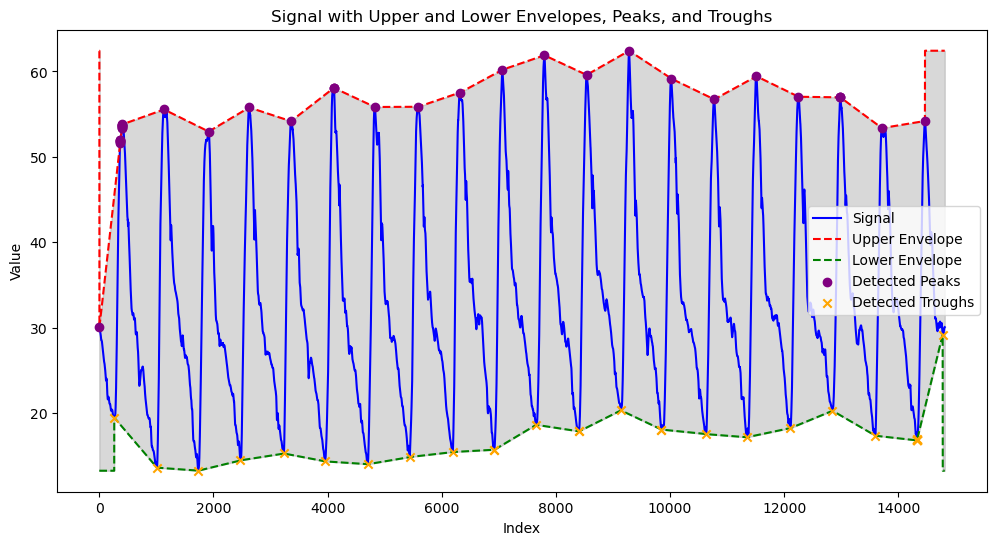

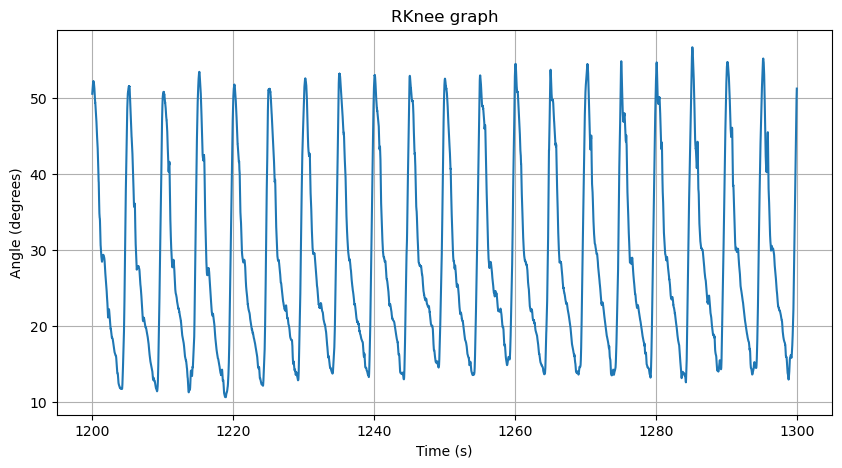

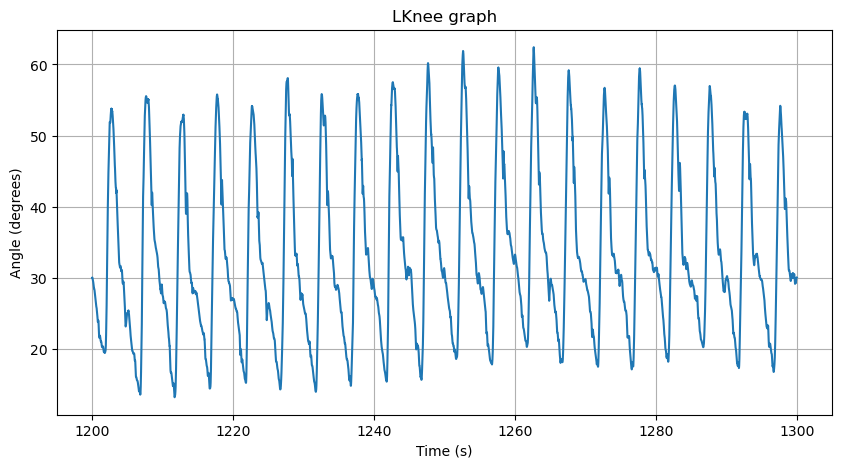

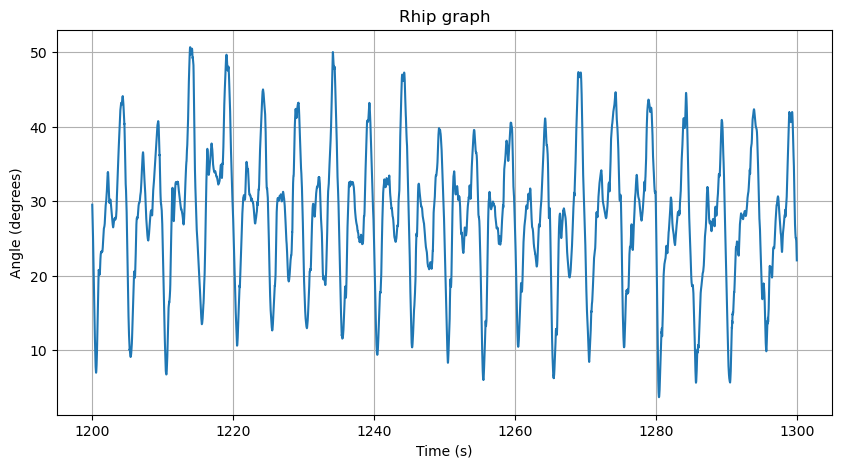

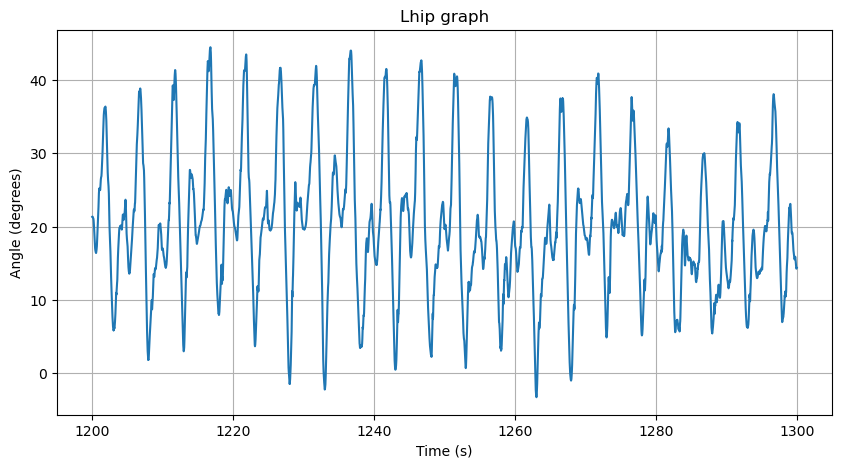

In [15]:
start_time = 1200
end_time = 1300
time_filtered = trigno[(trigno['X[s]'] >= start_time) & (trigno['X[s]'] <= end_time)]

# Indices for the filtered time range
indices = time_filtered.index

# Filter knee and hip angles within the time range
Rknee_angles_filtered = Rknee_angles[indices[0]-1:indices[-1]]
Lknee_angles_filtered = Lknee_angles[indices[0]-1:indices[-1]]

Rhip_angles_filtered = Rhip_angles[indices[0]-1:indices[-1]]
Lhip_angles_filtered = Lhip_angles[indices[0]-1:indices[-1]]

######################################################################################################
Lknee_angles_column = Lknee_angles_filtered[:, 0]
Lsignal = Lknee_angles_column  # Replace with your actual data
Lupper_envelope, Llower_envelope = compute_envelopes(Lsignal,120)
Lpeaks, Ltroughs = detect_peaks_from_envelope(Lsignal, Lupper_envelope, Llower_envelope)


# Plot the signal and its envelopes
plt.figure(figsize=(12, 6))
plt.plot(Lsignal, label='Signal', color='blue')
plt.plot(Lupper_envelope, label='Upper Envelope', color='red', linestyle='--')
plt.plot(Llower_envelope, label='Lower Envelope', color='green', linestyle='--')

# Plot detected peaks and troughs
plt.scatter(Lpeaks, Lsignal[Lpeaks], color='purple', marker='o', label='Detected Peaks', zorder=5)
plt.scatter(Ltroughs, Lsignal[Ltroughs], color='orange', marker='x', label='Detected Troughs', zorder=5)

# Fill the area between envelopes
plt.fill_between(range(len(Lsignal)), Llower_envelope, Lupper_envelope, color='grey', alpha=0.3)

# Add labels and legend
plt.legend()
plt.title('Signal with Upper and Lower Envelopes, Peaks, and Troughs')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

###########################################################################################################


# Plotting the knee angles within the specified range

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Rknee_angles_filtered[:, 0], label='RKnee Angle X')
#plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], knee_angles_filtered[:, 1], label='Knee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('RKnee graph')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Lknee_angles_filtered[:, 0], label='LKnee Angle X')
#plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], knee_angles_filtered[:, 1], label='Knee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('LKnee graph')
plt.grid(True)


plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Rhip_angles_filtered[:, 0], label='Rhip Angle X')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Rhip graph')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Lhip_angles_filtered[:, 0], label='Lhip Angle X')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Lhip graph')
plt.grid(True)


plt.show()

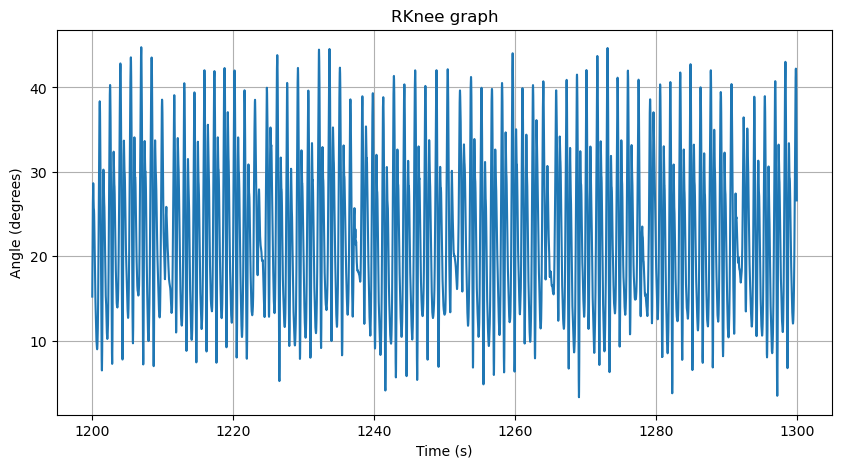

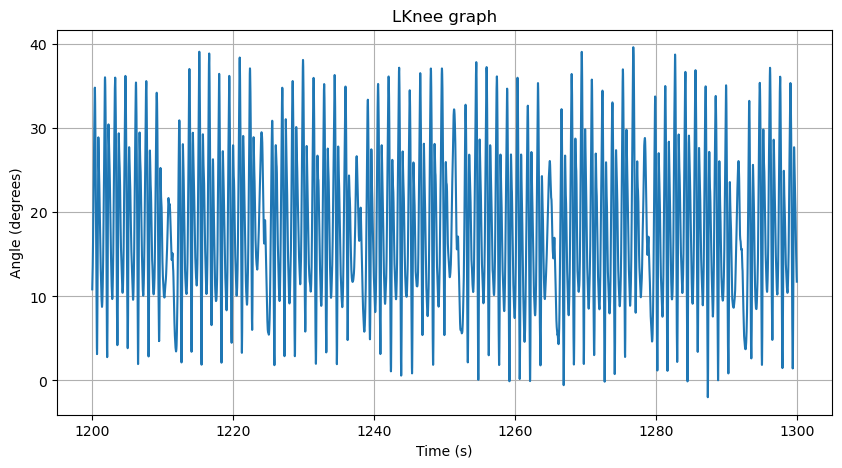

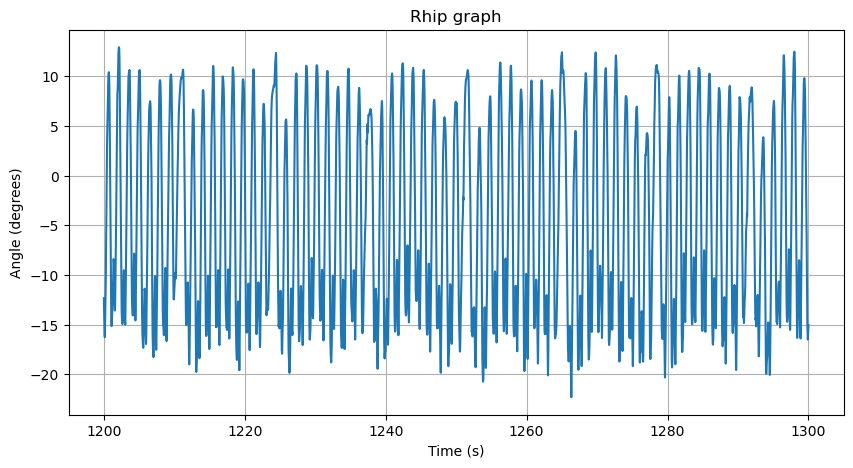

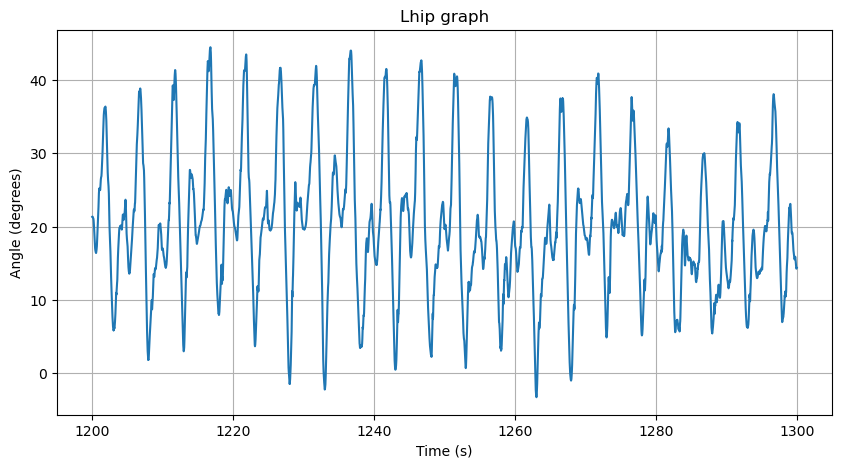

In [16]:
start_time = 1199
end_time = 1200
time_filtered_i = trigno_i[(trigno_i['X[s]'] >= start_time) & (trigno_i['X[s]'] <= end_time)]

# Indices for the filtered time range
indices_i = time_filtered.index

# Filter knee and hip angles within the time range
Rknee_angles_filtered_i = Rknee_angles_i[indices_i[0]-1:indices_i[-1]]
Lknee_angles_filtered_i = Lknee_angles_i[indices_i[0]-1:indices_i[-1]]

Rhip_angles_filtered_i = Rhip_angles_i[indices_i[0]-1:indices_i[-1]]
Lhip_angles_filtered_i = Lhip_angles[indices_i[0]-1:indices_i[-1]]



# Plotting the knee angles within the specified range

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Rknee_angles_filtered_i[:, 0], label='RKnee Angle X')
#plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], knee_angles_filtered[:, 1], label='Knee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('RKnee graph')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Lknee_angles_filtered_i[:, 0], label='LKnee Angle X')
#plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], knee_angles_filtered[:, 1], label='Knee Angle Y')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('LKnee graph')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Rhip_angles_filtered_i[:, 0], label='Rhip Angle X')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Rhip graph')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Lhip_angles_filtered_i[:, 0], label='Lhip Angle X')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Lhip graph')
plt.grid(True)


plt.show()

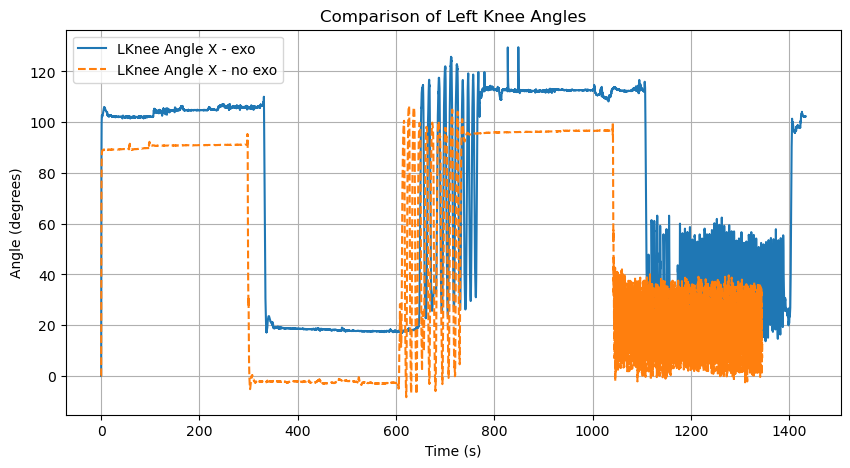

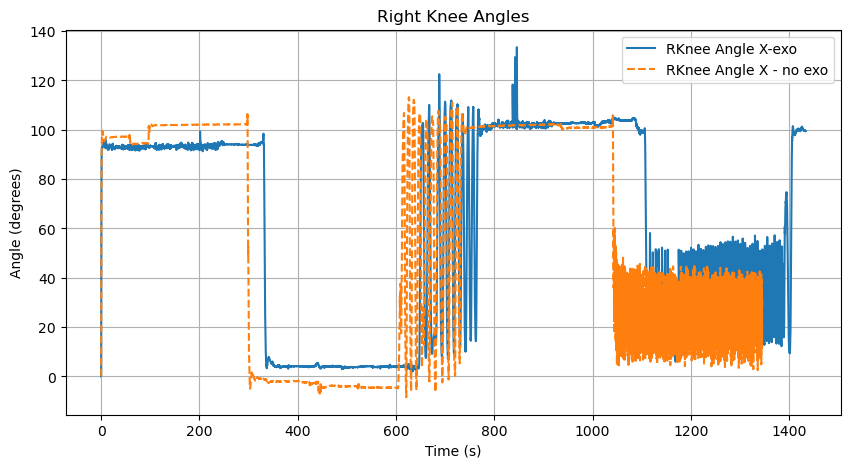

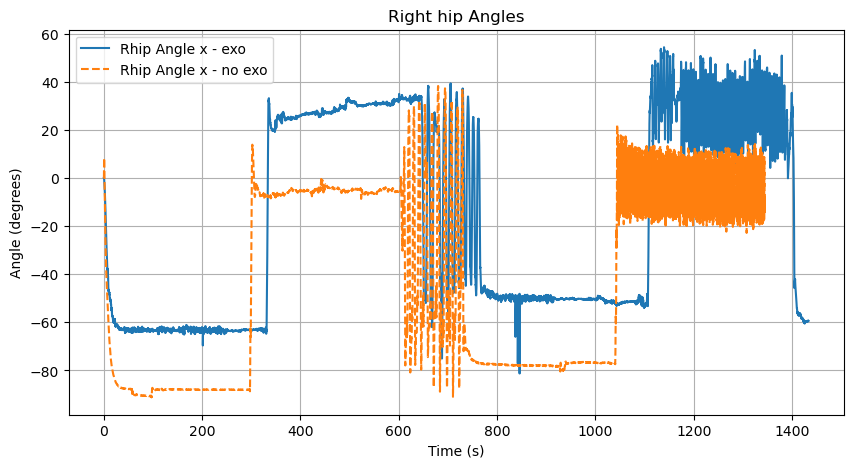

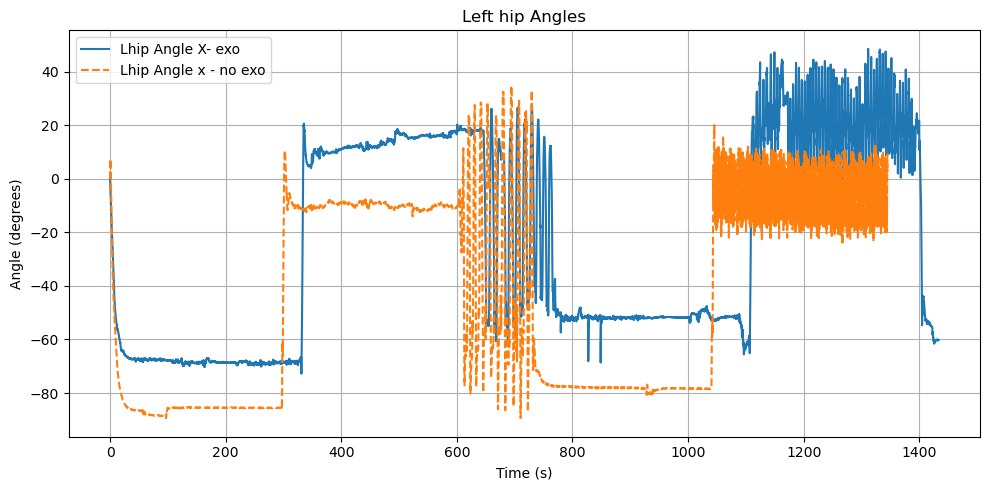

In [17]:
plt.figure(figsize=(10, 5))

# first set of data
plt.plot(trigno['X[s]'][1:], Lknee_angles[:, 0], label='LKnee Angle X - exo')
# second set of data
plt.plot(trigno_i['X[s]'][1:], Lknee_angles_i[:, 0], label='LKnee Angle X - no exo', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Comparison of Left Knee Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
#first set
plt.plot(trigno['X[s]'][1:], Rknee_angles[:, 0], label='RKnee Angle X-exo')
#second set
plt.plot(trigno_i['X[s]'][1:], Rknee_angles_i[:, 0], label='RKnee Angle X - no exo', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Right Knee Angles')
plt.legend()
plt.grid(True)


plt.figure(figsize=(10, 5))
#first set
plt.plot(trigno['X[s]'][1:], Rhip_angles[:, 0], label='Rhip Angle x - exo')
#second set
plt.plot(trigno_i['X[s]'][1:], Rhip_angles_i[:, 0], label='Rhip Angle x - no exo', linestyle='--')


plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Right hip Angles')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][1:], Lhip_angles[:, 0], label='Lhip Angle X- exo')
plt.plot(trigno_i['X[s]'][1:], Lhip_angles_i[:, 0], label='Lhip Angle x - no exo', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Left hip Angles')
plt.legend()
plt.grid(True)




plt.tight_layout()
plt.show()




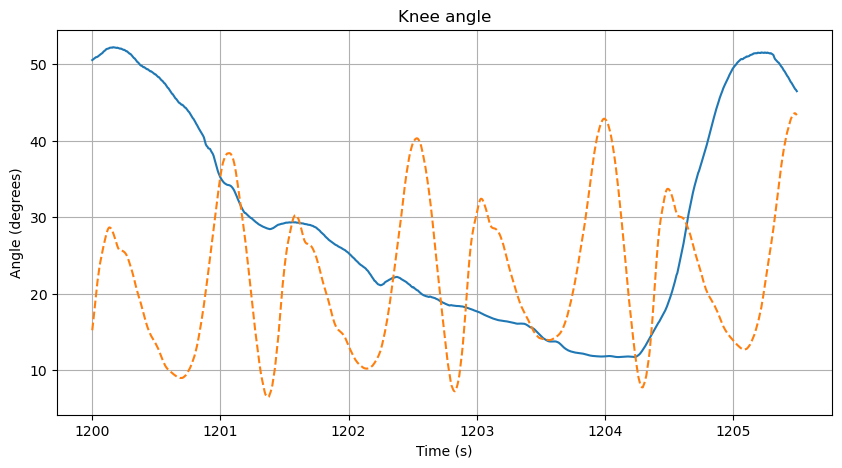

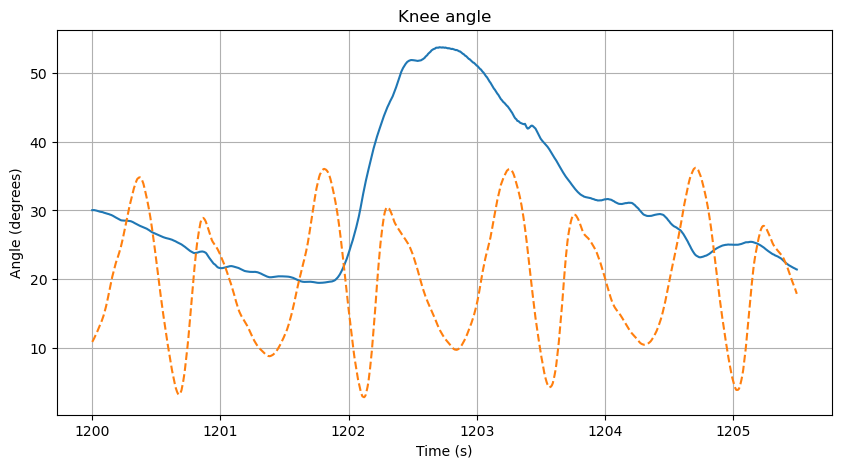

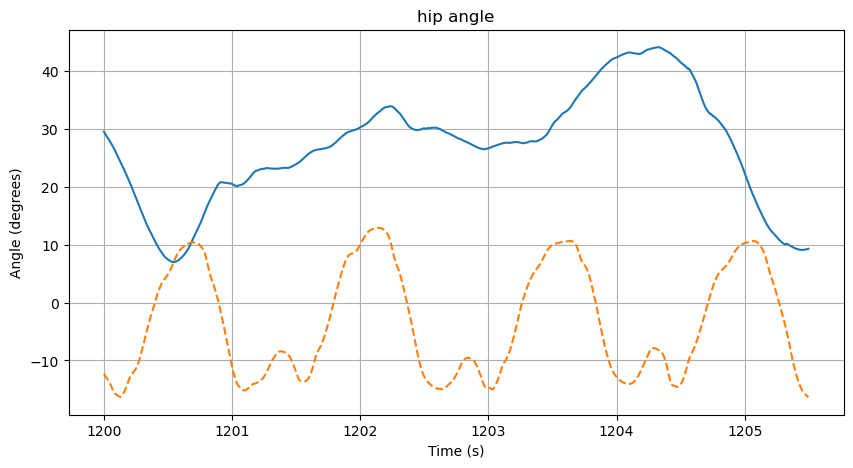

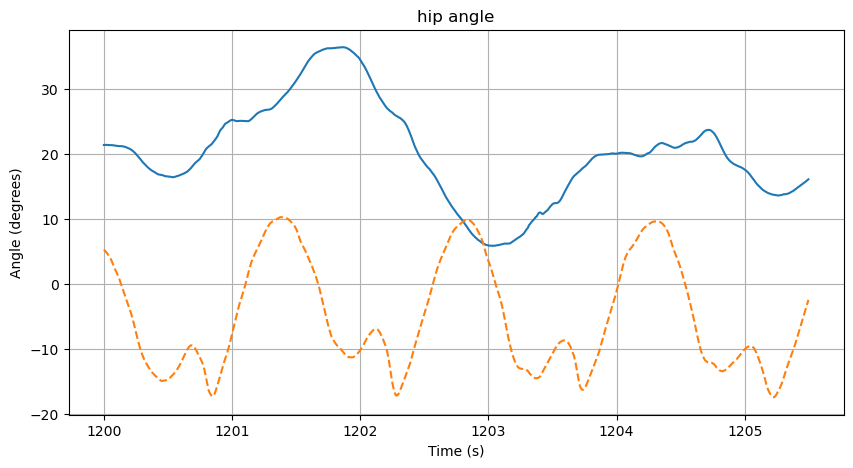

In [18]:
start_time = 1200
end_time = 1205.5

time_filtered = trigno[(trigno['X[s]'] >= start_time) & (trigno['X[s]'] <= end_time)]
time_filtered_i = trigno_i[(trigno_i['X[s]'] >= start_time) & (trigno_i['X[s]'] <= end_time)]

# Indices for the filtered time range
indices = time_filtered.index
indices_i = time_filtered_i.index

# Filter knee and hip angles within the time range
Rknee_angles_filtered = Rknee_angles[indices[0]-1:indices[-1]]
Lknee_angles_filtered = Lknee_angles[indices[0]-1:indices[-1]]

Rhip_angles_filtered = Rhip_angles[indices[0]-1:indices[-1]]
Lhip_angles_filtered = Lhip_angles[indices[0]-1:indices[-1]]


Rknee_angles_filtered_i = Rknee_angles_i[indices_i[0]-1:indices_i[-1]]
Lknee_angles_filtered_i = Lknee_angles_i[indices_i[0]-1:indices_i[-1]]

Rhip_angles_filtered_i = Rhip_angles_i[indices_i[0]-1:indices_i[-1]]
Lhip_angles_filtered_i = Lhip_angles_i[indices_i[0]-1:indices_i[-1]]

# Plotting the knee angles within the specified range

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Rknee_angles_filtered[:, 0], label='RKnee Angle X exo')
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Rknee_angles_filtered_i[:, 0], label='RKnee Angle X not exo',linestyle='--' )
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Knee angle')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Lknee_angles_filtered[:, 0], label='LKnee Angle exo X')
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Lknee_angles_filtered_i[:, 0], label='LKnee Angle X not exo',linestyle='--' )
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Knee angle')
plt.grid(True)


plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Rhip_angles_filtered[:, 0], label='Rhip Angle X exo')
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Rhip_angles_filtered_i[:, 0], label='Rhip Angle X no exo', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('hip angle')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(trigno['X[s]'][indices[0]:indices[-1]+1], Lhip_angles_filtered[:, 0], label='Lhip Angle X exo')
plt.plot(trigno_i['X[s]'][indices_i[0]:indices_i[-1]+1], Lhip_angles_filtered_i[:, 0], label='Lhip Angle X no exo', linestyle='--')

plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('hip angle')
plt.grid(True)



plt.show()

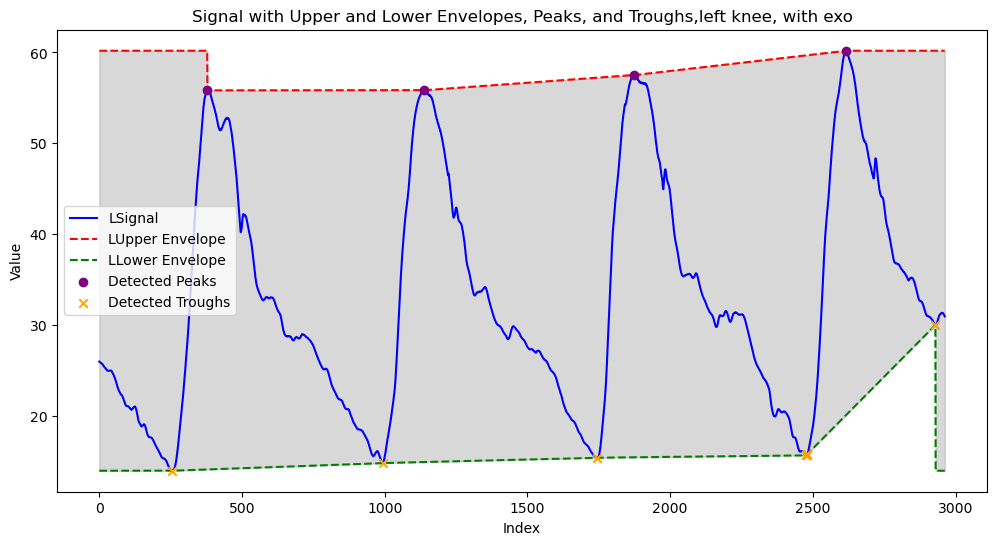

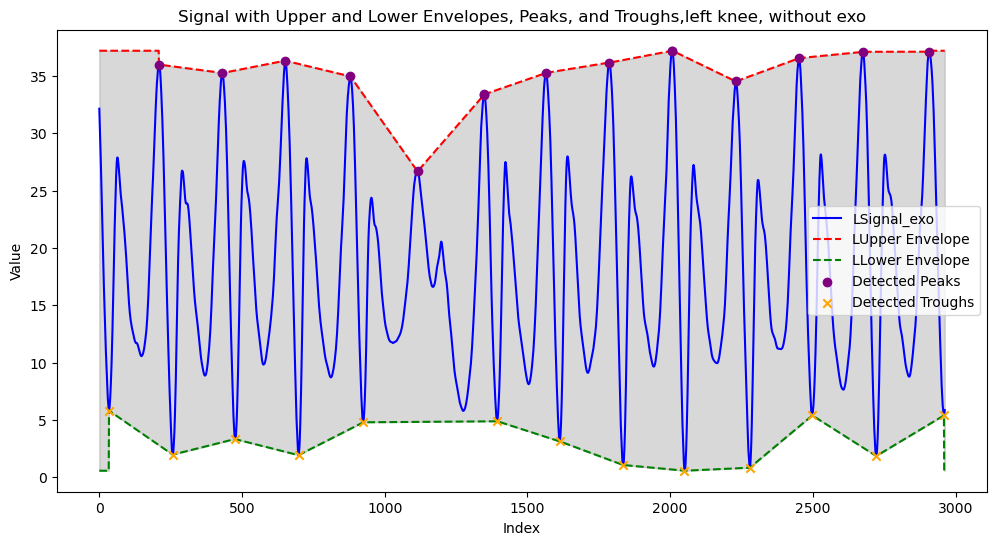

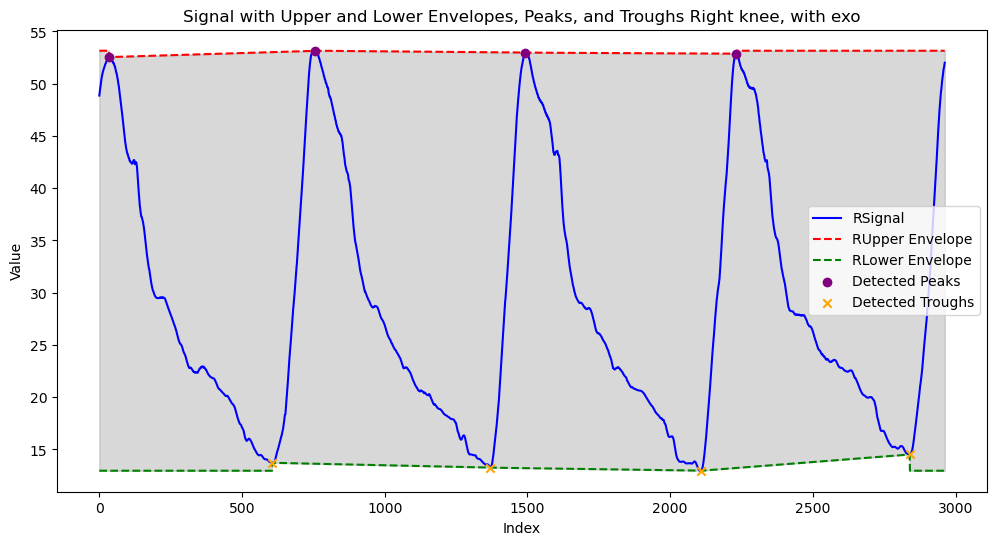

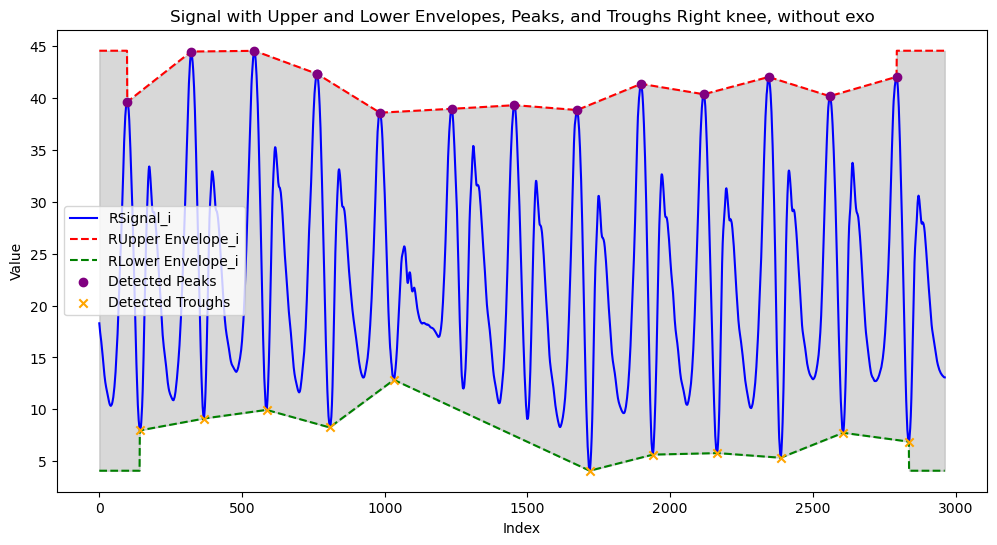

In [19]:
#detecting peaks and troughs in walking phase for Lift and right knee with and without exo during walking phase

start_time = 1230
end_time = 1250

time_filtered = trigno[(trigno['X[s]'] >= start_time) & (trigno['X[s]'] <= end_time)]
time_filtered_i = trigno_i[(trigno_i['X[s]'] >= start_time) & (trigno_i['X[s]'] <= end_time)]

# Indices for the filtered time range
indices = time_filtered.index
indices_i = time_filtered_i.index

# Filter knee and hip angles within the time range
Rknee_angles_filtered = Rknee_angles[indices[0]-1:indices[-1]]
Lknee_angles_filtered = Lknee_angles[indices[0]-1:indices[-1]]


Rknee_angles_filtered_i = Rknee_angles_i[indices_i[0]-1:indices_i[-1]]
Lknee_angles_filtered_i = Lknee_angles_i[indices_i[0]-1:indices_i[-1]]



Lknee_angles_column = Lknee_angles_filtered[:, 0]
Rknee_angles_column = Rknee_angles_filtered[:, 0]
Lknee_angles_column_i = Lknee_angles_filtered_i[:, 0]
Rknee_angles_column_i = Rknee_angles_filtered_i[:, 0]



Lsignal = Lknee_angles_column  
Lsignal_i = Lknee_angles_column_i
Rsignal = Rknee_angles_column  
Rsignal_i = Rknee_angles_column_i


Lupper_envelope, Llower_envelope = compute_envelopes(Lsignal,120)
Lpeaks, Ltroughs = detect_peaks_from_envelope(Lsignal, Lupper_envelope, Llower_envelope)

Lupper_envelope_i, Llower_envelope_i = compute_envelopes(Lsignal_i,120)
Lpeaks_i, Ltroughs_i = detect_peaks_from_envelope(Lsignal_i, Lupper_envelope_i, Llower_envelope_i)


Rupper_envelope, Rlower_envelope = compute_envelopes(Rsignal,120)
Rpeaks, Rtroughs = detect_peaks_from_envelope(Rsignal, Rupper_envelope, Rlower_envelope)


Rupper_envelope_i, Rlower_envelope_i = compute_envelopes(Rsignal_i,120)
Rpeaks_i, Rtroughs_i = detect_peaks_from_envelope(Rsignal_i, Rupper_envelope_i, Rlower_envelope_i)




# Plot the signal and its envelopes
plt.figure(figsize=(12, 6))
plt.plot(Lsignal, label='LSignal', color='blue')
plt.plot(Lupper_envelope, label='LUpper Envelope', color='red', linestyle='--')
plt.plot(Llower_envelope, label='LLower Envelope', color='green', linestyle='--')

# Plot detected peaks and troughs
plt.scatter(Lpeaks, Lsignal[Lpeaks], color='purple', marker='o', label='Detected Peaks', zorder=5)
plt.scatter(Ltroughs, Lsignal[Ltroughs], color='orange', marker='x', label='Detected Troughs', zorder=5)

# Fill the area between envelopes
plt.fill_between(range(len(Lsignal)), Llower_envelope, Lupper_envelope, color='grey', alpha=0.3)

# Add labels and legend
plt.legend()
plt.title('Signal with Upper and Lower Envelopes, Peaks, and Troughs,left knee, with exo')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()



plt.figure(figsize=(12, 6))
plt.plot(Lsignal_i, label='LSignal_exo', color='blue')
plt.plot(Lupper_envelope_i, label='LUpper Envelope', color='red', linestyle='--')
plt.plot(Llower_envelope_i, label='LLower Envelope', color='green', linestyle='--')

# Plot detected peaks and troughs
plt.scatter(Lpeaks_i, Lsignal_i[Lpeaks_i], color='purple', marker='o', label='Detected Peaks', zorder=5)
plt.scatter(Ltroughs_i, Lsignal_i[Ltroughs_i], color='orange', marker='x', label='Detected Troughs', zorder=5)

# Fill the area between envelopes
plt.fill_between(range(len(Lsignal_i)), Llower_envelope_i, Lupper_envelope_i, color='grey', alpha=0.3)

# Add labels and legend
plt.legend()
plt.title('Signal with Upper and Lower Envelopes, Peaks, and Troughs,left knee, without exo')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()




plt.figure(figsize=(12, 6))
plt.plot(Rsignal, label='RSignal', color='blue')
plt.plot(Rupper_envelope, label='RUpper Envelope', color='red', linestyle='--')
plt.plot(Rlower_envelope, label='RLower Envelope', color='green', linestyle='--')

# Plot detected peaks and troughs
plt.scatter(Rpeaks, Rsignal[Rpeaks], color='purple', marker='o', label='Detected Peaks', zorder=5)
plt.scatter(Rtroughs, Rsignal[Rtroughs], color='orange', marker='x', label='Detected Troughs', zorder=5)

# Fill the area between envelopes
plt.fill_between(range(len(Rsignal)), Rlower_envelope, Rupper_envelope, color='grey', alpha=0.3)

# Add labels and legend
plt.legend()
plt.title('Signal with Upper and Lower Envelopes, Peaks, and Troughs Right knee, with exo')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()





plt.figure(figsize=(12, 6))
plt.plot(Rsignal_i, label='RSignal_i', color='blue')
plt.plot(Rupper_envelope_i, label='RUpper Envelope_i', color='red', linestyle='--')
plt.plot(Rlower_envelope_i, label='RLower Envelope_i', color='green', linestyle='--')

# Plot detected peaks and troughs
plt.scatter(Rpeaks_i, Rsignal_i[Rpeaks_i], color='purple', marker='o', label='Detected Peaks', zorder=5)
plt.scatter(Rtroughs_i, Rsignal_i[Rtroughs_i], color='orange', marker='x', label='Detected Troughs', zorder=5)

# Fill the area between envelopes
plt.fill_between(range(len(Rsignal_i)), Rlower_envelope_i, Rupper_envelope_i, color='grey', alpha=0.3)

# Add labels and legend
plt.legend()
plt.title('Signal with Upper and Lower Envelopes, Peaks, and Troughs Right knee, without exo')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()




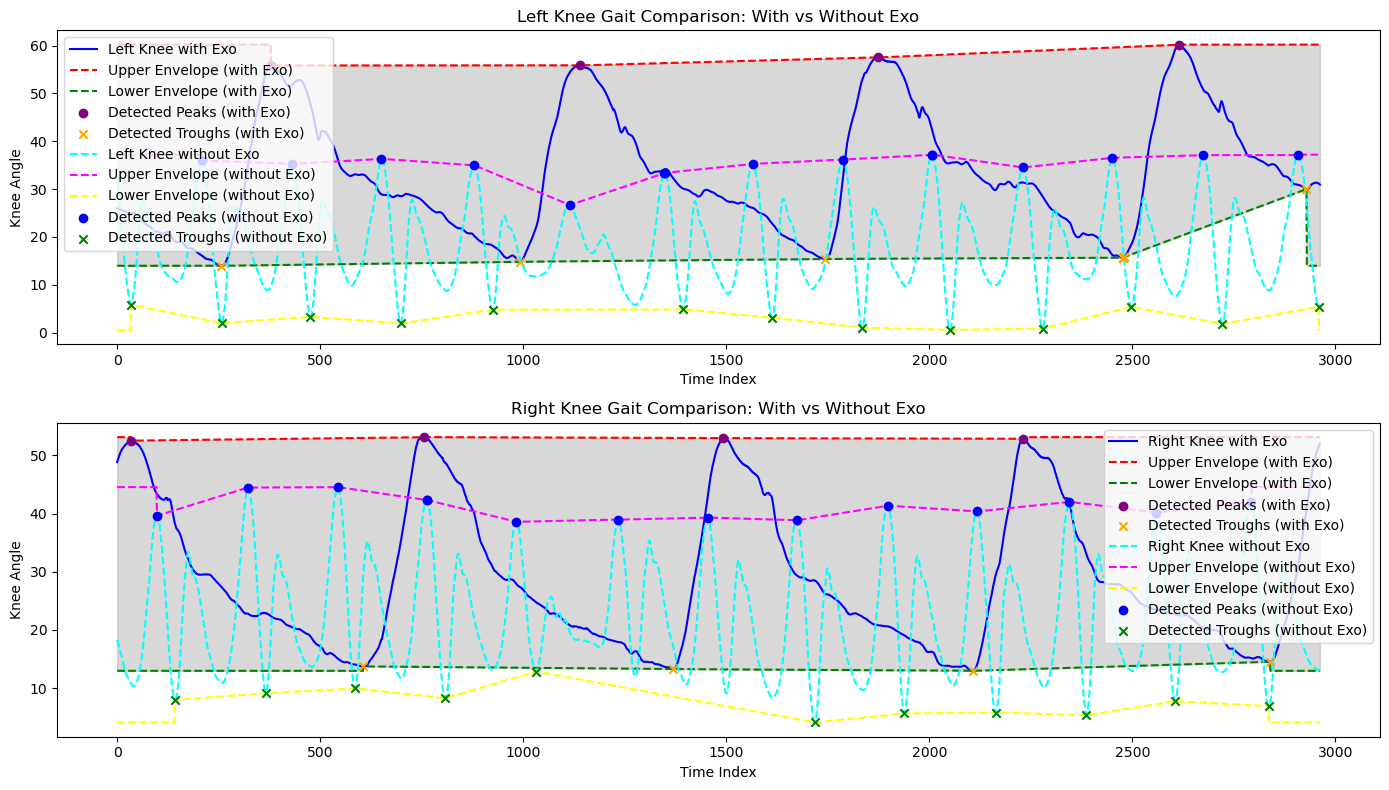

In [20]:
#Align Data by Gait Events
#Plot Gait Events on Same Graph


# Define a function to align and plot the gait data
def plot_gait_comparison(Lsignal, Lsignal_i, Rsignal, Rsignal_i, 
                         Lupper_envelope, Llower_envelope, 
                         Lupper_envelope_i, Llower_envelope_i,
                         Lpeaks, Ltroughs, Lpeaks_i, Ltroughs_i,
                         Rupper_envelope, Rlower_envelope,
                         Rupper_envelope_i, Rlower_envelope_i,
                         Rpeaks, Rtroughs, Rpeaks_i, Rtroughs_i):
    
    # Plot Left Knee Signal with and without Exo
    plt.figure(figsize=(14, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(Lsignal, label='Left Knee with Exo', color='blue')
    plt.plot(Lupper_envelope, label='Upper Envelope (with Exo)', color='red', linestyle='--')
    plt.plot(Llower_envelope, label='Lower Envelope (with Exo)', color='green', linestyle='--')
    plt.scatter(Lpeaks, Lsignal[Lpeaks], color='purple', marker='o', label='Detected Peaks (with Exo)', zorder=5)
    plt.scatter(Ltroughs, Lsignal[Ltroughs], color='orange', marker='x', label='Detected Troughs (with Exo)', zorder=5)
    
    plt.plot(Lsignal_i, label='Left Knee without Exo', color='cyan', linestyle='--')
    plt.plot(Lupper_envelope_i, label='Upper Envelope (without Exo)', color='magenta', linestyle='--')
    plt.plot(Llower_envelope_i, label='Lower Envelope (without Exo)', color='yellow', linestyle='--')
    plt.scatter(Lpeaks_i, Lsignal_i[Lpeaks_i], color='blue', marker='o', label='Detected Peaks (without Exo)', zorder=5)
    plt.scatter(Ltroughs_i, Lsignal_i[Ltroughs_i], color='green', marker='x', label='Detected Troughs (without Exo)', zorder=5)
    
    plt.fill_between(range(len(Lsignal)), Llower_envelope, Lupper_envelope, color='grey', alpha=0.3)
    
    plt.title('Left Knee Gait Comparison: With vs Without Exo')
    plt.xlabel('Time Index')
    plt.ylabel('Knee Angle')
    plt.legend()

    # Plot Right Knee Signal with and without Exo
    plt.subplot(2, 1, 2)
    plt.plot(Rsignal, label='Right Knee with Exo', color='blue')
    plt.plot(Rupper_envelope, label='Upper Envelope (with Exo)', color='red', linestyle='--')
    plt.plot(Rlower_envelope, label='Lower Envelope (with Exo)', color='green', linestyle='--')
    plt.scatter(Rpeaks, Rsignal[Rpeaks], color='purple', marker='o', label='Detected Peaks (with Exo)', zorder=5)
    plt.scatter(Rtroughs, Rsignal[Rtroughs], color='orange', marker='x', label='Detected Troughs (with Exo)', zorder=5)
    
    plt.plot(Rsignal_i, label='Right Knee without Exo', color='cyan', linestyle='--')
    plt.plot(Rupper_envelope_i, label='Upper Envelope (without Exo)', color='magenta', linestyle='--')
    plt.plot(Rlower_envelope_i, label='Lower Envelope (without Exo)', color='yellow', linestyle='--')
    plt.scatter(Rpeaks_i, Rsignal_i[Rpeaks_i], color='blue', marker='o', label='Detected Peaks (without Exo)', zorder=5)
    plt.scatter(Rtroughs_i, Rsignal_i[Rtroughs_i], color='green', marker='x', label='Detected Troughs (without Exo)', zorder=5)
    
    plt.fill_between(range(len(Rsignal)), Rlower_envelope, Rupper_envelope, color='grey', alpha=0.3)
    
    plt.title('Right Knee Gait Comparison: With vs Without Exo')
    plt.xlabel('Time Index')
    plt.ylabel('Knee Angle')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_gait_comparison(Lsignal, Lsignal_i, Rsignal, Rsignal_i, 
                     Lupper_envelope, Llower_envelope, 
                     Lupper_envelope_i, Llower_envelope_i,
                     Lpeaks, Ltroughs, Lpeaks_i, Ltroughs_i,
                     Rupper_envelope, Rlower_envelope,
                     Rupper_envelope_i, Rlower_envelope_i,
                     Rpeaks, Rtroughs, Rpeaks_i, Rtroughs_i)



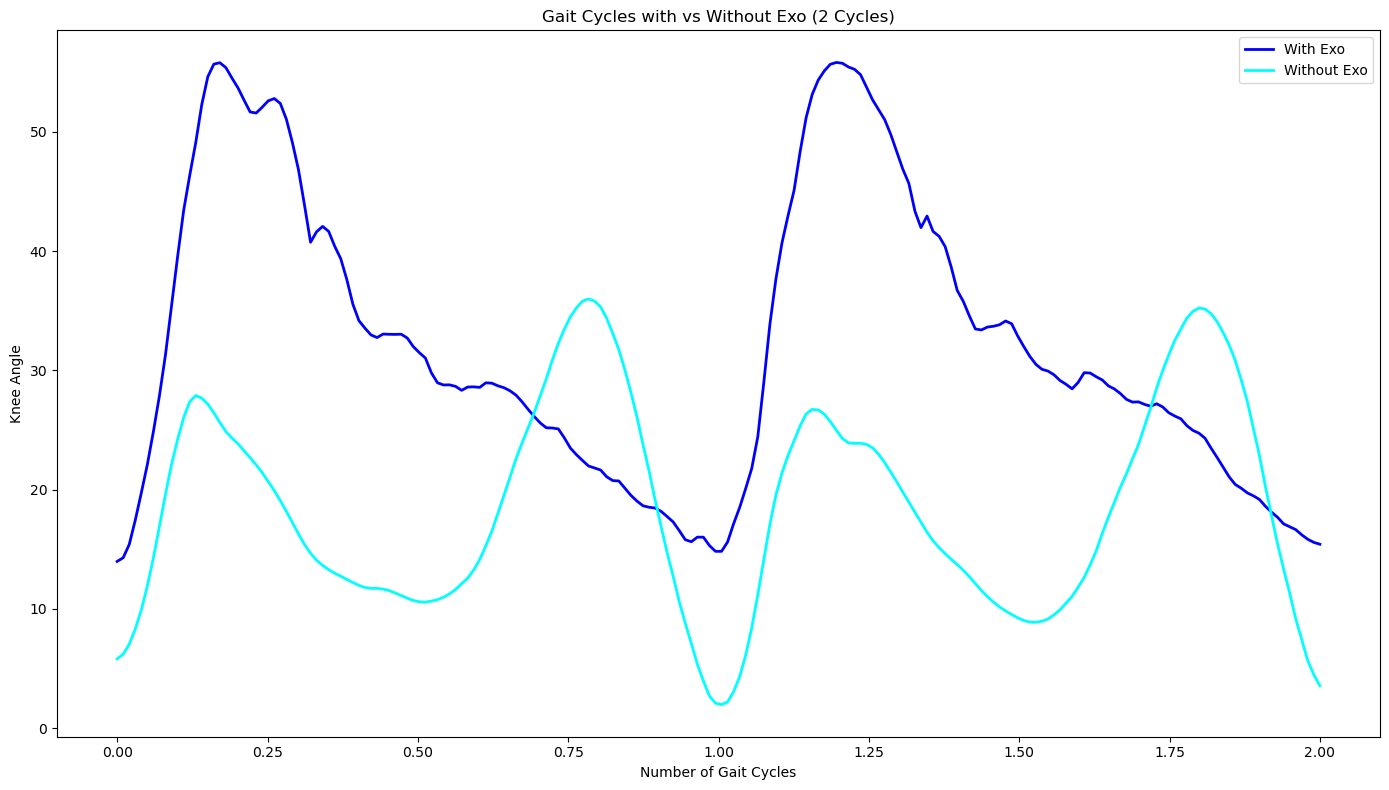

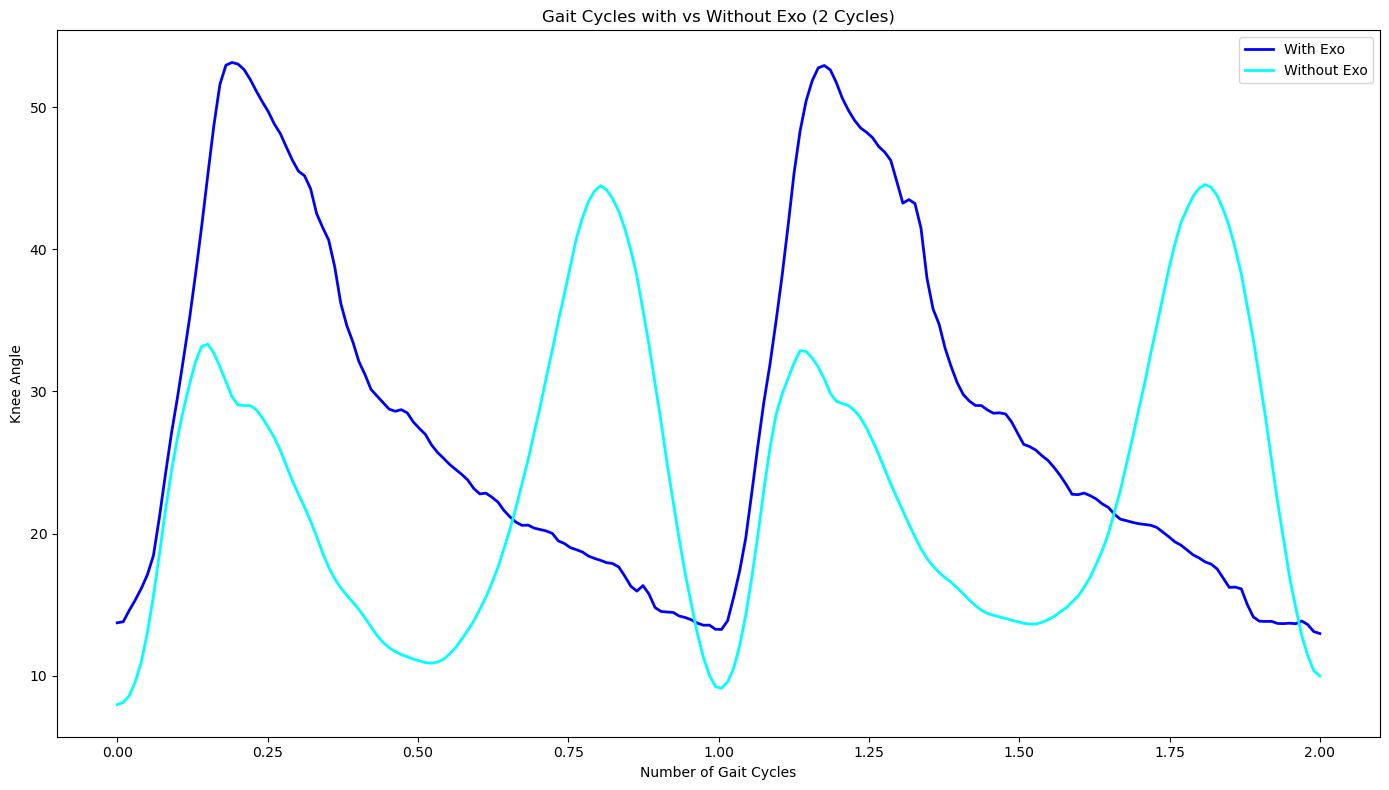

In [21]:


def plot_gait_cycles_with_exo_vs_without_exo(signal_with_exo, signal_without_exo, peaks_with_exo, troughs_with_exo, peaks_without_exo, troughs_without_exo, num_cycles):
    """
    Plot gait cycles with and without exoskeleton on the same graph.

    Parameters:
    - signal_with_exo (numpy array): 1D array of signal data with exo.
    - signal_without_exo (numpy array): 1D array of signal data without exo.
    - peaks_with_exo (numpy array): Indices of detected peaks (with exo).
    - troughs_with_exo (numpy array): Indices of detected troughs (with exo).
    - peaks_without_exo (numpy array): Indices of detected peaks (without exo).
    - troughs_without_exo (numpy array): Indices of detected troughs (without exo).
    - num_cycles (int): Number of gait cycles to plot.
    """
    # Extract and normalize gait cycles
    cycles_with_exo = extract_gait_cycles(signal_with_exo, peaks_with_exo, troughs_with_exo, num_cycles)
    cycles_without_exo = extract_gait_cycles(signal_without_exo, peaks_without_exo, troughs_without_exo, num_cycles)
    
    normalized_cycles_with_exo = normalize_cycles(cycles_with_exo, target_length=100)
    normalized_cycles_without_exo = normalize_cycles(cycles_without_exo, target_length=100)
    
    # Concatenate cycles to form continuous signals
    concatenated_with_exo = concatenate_cycles(normalized_cycles_with_exo)
    concatenated_without_exo = concatenate_cycles(normalized_cycles_without_exo)
    
    # Create x-axis representing the number of cycles
    x_axis_with_exo = np.linspace(0, num_cycles, len(concatenated_with_exo))
    x_axis_without_exo = np.linspace(0, num_cycles, len(concatenated_without_exo))
    
    # Plotting
    plt.figure(figsize=(14, 8))
    
    # Plot gait cycles with exo
    plt.plot(x_axis_with_exo, concatenated_with_exo, label='With Exo', color='blue', linewidth=2)
    
    # Plot gait cycles without exo
    plt.plot(x_axis_without_exo, concatenated_without_exo, label='Without Exo', color='cyan', linewidth=2)
    
    plt.title(f'Gait Cycles with vs Without Exo ({num_cycles} Cycles)')
    plt.xlabel('Number of Gait Cycles')
    plt.ylabel('Knee Angle')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

num_cycles = 2 # Specify the number of gait cycles you want to compare

plot_gait_cycles_with_exo_vs_without_exo(Lsignal, Lsignal_i, Lpeaks, Ltroughs, Lpeaks_i, Ltroughs_i, num_cycles)
plot_gait_cycles_with_exo_vs_without_exo(Rsignal, Rsignal_i, Rpeaks, Rtroughs, Rpeaks_i, Rtroughs_i, num_cycles)

